<a href="https://colab.research.google.com/github/csantanaes/analisedadostwitter/blob/main/EARTE_Analise_Twitter_julho_2021_26072021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Projeto Analise de dados Twitter hastag #earte - Ensino remoto emergencial UFES - Pandemia

# 1.1 Montando e acessando Drive  

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

import time
print(time.ctime())

Mounted at /content/gdrive
Fri Aug 13 22:24:36 2021


In [2]:
import datetime
import pytz
my_date = datetime.datetime.now(pytz.timezone('America/Sao_Paulo'))
print(my_date)

2021-08-13 19:24:44.909368-03:00


In [ ]:
#import CSV to Colab

url = 'copied_raw_github_link'
df = pd.read_csv(url)

# 1.2 Import CSV

In [6]:
# IMPORTANDO CSV para Colab 
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/DATA/Twitter/ensinoremoto13082021.csv')
#df = pd.read_csv('/content/drive/MyDrive/DATA/ids_ensinoremoto28072021.csv')
#/content/drive/MyDrive/DATA/ids_ensinoremoto28072021.csv
#/content/gdrive/MyDrive/DATA/ids_ensinoremoto28072021.csv
#df = pd.read_csv('/content/sample_data/ids_ensinoremoto28072021.csv')
#df = pd.read_csv('/content/drive/MyDrive/DATA/tweets_EARTE_hydrated.csv')
#df = pd.read_csv('/content/gdrive/MyDrive/DATA/EARTE/earte29062021.csv')
#df = pd.read_csv('/content/gdrive/MyDrive/DATA/ensinoremoto16072021.csv')

#mostra 5 primeiros registros do dataframe
df.head()
# 

id                created_at  ... __twarc.version Unnamed: 91
0  1425117690226745345  2021-08-10T15:31:49.000Z  ...           2.3.7         NaN
1  1424525727572037638  2021-08-09T00:19:34.000Z  ...           2.3.7         NaN
2  1424538446345932807  2021-08-09T01:10:06.000Z  ...           2.3.7         NaN
3  1423368974792855553  2021-08-05T19:43:03.000Z  ...           2.3.7         NaN
4  1422964235034845184  2021-08-04T16:54:45.000Z  ...           2.3.7         NaN

[5 rows x 92 columns]

# 1.3 Infomações Dataframe 

In [7]:
df.shape #Quantidade de linhas e colunas do DataFrame

(367, 92)

In [8]:
df.index #Descrição do Index

RangeIndex(start=0, stop=367, step=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               367 non-null    int64  
 1   created_at                                       360 non-null    object 
 2   text                                             360 non-null    object 
 3   attachments.media                                59 non-null     object 
 4   attachments.media_keys                           59 non-null     object 
 5   attachments.poll.duration_minutes                1 non-null      float64
 6   attachments.poll.end_datetime                    1 non-null      object 
 7   attachments.poll.id                              1 non-null      float64
 8   attachments.poll.options                         1 non-null      object 
 9   attachments.poll.voting_status  

In [ ]:
df.columns #Colunas presentes no DataFrame

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [10]:
df.count() #Contagem de dados não-nulos

id                        367
created_at                360
text                      360
attachments.media          59
attachments.media_keys     59
                         ... 
withheld.country_codes      0
__twarc.retrieved_at      367
__twarc.url               367
__twarc.version           366
Unnamed: 91                 0
Length: 92, dtype: int64

In [ ]:
#https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93

In [ ]:
df['text']

0       A Comissão de Acompanhamento ao Trabalho/Ensin...
1       Zoom e outras reuniões pela Internet l"Se você...
2       Ensino remoto tá puxado pra todo mundo, né?\nT...
3       RT @ericbrasiln: Ensino remoto tá puxado pra t...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisação, não inovação educ...
3057    A ironia provocada pelo novo coronavírus.\nNa ...
3058    En una semana todos los docentes trabajando te...
3059    É a verdade, incomode a quem incomodar.\nEs la...
Name: text, Length: 3060, dtype: object

In [ ]:
#Removendo  caracteres chineses do dataframe
df['text'] = df['text'].astype(str)
#df.text.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
#data = re.sub("([^\x00-\x7F])+"," ",df.text)
import re
def replace_foreign_characters(s):
    return re.sub(r'[^\x00-\x7f]',r'', s)

df['text'] = df['text'].apply(lambda x: replace_foreign_characters(x))

In [ ]:
df['text']

0       A Comisso de Acompanhamento ao Trabalho/Ensino...
1       Zoom e outras reunies pela Internet l"Se voc p...
2       Ensino remoto t puxado pra todo mundo, n?\nTen...
3       RT @ericbrasiln: Ensino remoto t puxado pra to...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisao, no inovao educacion...
3057    A ironia provocada pelo novo coronavrus.\nNa E...
3058    En una semana todos los docentes trabajando te...
3059     a verdade, incomode a quem incomodar.\nEs la ...
Name: text, Length: 3060, dtype: object

In [ ]:
df['text'] = df['text'].str.replace(r'[^\x00-\x7F]+', '')

In [ ]:
df['text']

0       A Comisso de Acompanhamento ao Trabalho/Ensino...
1       Zoom e outras reunies pela Internet l"Se voc p...
2       Ensino remoto t puxado pra todo mundo, n?\nTen...
3       RT @ericbrasiln: Ensino remoto t puxado pra to...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisao, no inovao educacion...
3057    A ironia provocada pelo novo coronavrus.\nNa E...
3058    En una semana todos los docentes trabajando te...
3059     a verdade, incomode a quem incomodar.\nEs la ...
Name: text, Length: 3060, dtype: object

In [ ]:
df[:100]

id                created_at  ... __twarc.version Unnamed: 91
0   1416145479939805191  2021-07-16T21:19:27.000Z  ...           2.3.7         NaN
1   1415925194321969155  2021-07-16T06:44:07.000Z  ...           2.3.7         NaN
2   1415123734671810561  2021-07-14T01:39:24.000Z  ...           2.3.7         NaN
3   1415873994637598722  2021-07-16T03:20:40.000Z  ...           2.3.7         NaN
4   1415059480149204996  2021-07-13T21:24:05.000Z  ...           2.3.7         NaN
..                  ...                       ...  ...             ...         ...
95  1415355590407331846  2021-07-14T17:00:43.000Z  ...           2.3.7         NaN
96  1415354921185054731  2021-07-14T16:58:03.000Z  ...           2.3.7         NaN
97  1415353491099463686  2021-07-14T16:52:22.000Z  ...           2.3.7         NaN
98  1415353450389544970  2021-07-14T16:52:13.000Z  ...           2.3.7         NaN
99  1415353217408544772  2021-07-14T16:51:17.000Z  ...           2.3.7         NaN

[100 rows x 92 columns]

In [ ]:
df.shape

(3060, 92)

In [ ]:
df.head(10).isna().sum()

coordinates                   10
created_at                     0
hashtags                       6
media                          8
urls                           5
favorite_count                 0
id                             0
in_reply_to_screen_name       10
in_reply_to_status_id         10
in_reply_to_user_id           10
lang                           0
place                         10
possibly_sensitive             5
retweet_count                  0
retweet_id                     4
retweet_screen_name            4
source                         0
text                           0
tweet_url                      0
user_created_at                0
user_screen_name               0
user_default_profile_image     0
user_description               0
user_favourites_count          0
user_followers_count           0
user_friends_count             0
user_listed_count              0
user_location                  1
user_name                      0
user_screen_name.1             0
user_statu

In [ ]:
en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(df.text))

In [ ]:
df['text']

0       A Comisso de Acompanhamento ao Trabalho/Ensino...
1       Zoom e outras reunies pela Internet l"Se voc p...
2       Ensino remoto t puxado pra todo mundo, n?\nTen...
3       RT @ericbrasiln: Ensino remoto t puxado pra to...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisao, no inovao educacion...
3057    A ironia provocada pelo novo coronavrus.\nNa E...
3058    En una semana todos los docentes trabajando te...
3059     a verdade, incomode a quem incomodar.\nEs la ...
Name: text, Length: 3060, dtype: object

In [ ]:
# The unicode accounts for chinese characters and punctuations

import re

def strip_chinese_words(string):
    # list of english words
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(string))
    
    # Remove word from the list, if not english
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string
# Apply strip_chinese_words(...) on the column 'text'
df['text'] = df['text'].apply(lambda x: strip_chinese_words(x))
df.head()

In [ ]:
df.head()

In [ ]:
df.shape

(3060, 92)

In [ ]:
#comando para limpar dataframe pelo author.username
df.drop(df.loc[df['author.username'] == '6U0w0U9'].index, inplace=True)

In [ ]:
df.shape

(23249, 92)

# 1.4 Importando pacotes Python

In [ ]:

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Processamento de Texto
import re

# 2.0 - Coletando informações sobre o dataframe importado

# 2.1 Tipo de dado do dataframe

In [ ]:
df.text.head(50)

0     A Comisso de Acompanhamento ao Trabalho/Ensino...
1     Zoom e outras reunies pela Internet l"Se voc p...
2     Ensino remoto t puxado pra todo mundo, n?\nTen...
3     RT @ericbrasiln: Ensino remoto t puxado pra to...
4     Diante dos desafios do nosso tempo, os educado...
5     RT @Oi_Futuro: Diante dos desafios do nosso te...
6     RT @Oi_Futuro: Diante dos desafios do nosso te...
7     RT @ericbrasiln: Ensino remoto t puxado pra to...
8     Divulgar um canal educativo nunca  demais!!!\n...
9     RT @quelliassis: Divulgar um canal educativo n...
10    RT @ericbrasiln: Ensino remoto t puxado pra to...
11    RT @Oi_Futuro: Diante dos desafios do nosso te...
12    No vdeo de hoje, a Andressa vai mostrar um jog...
13    Abra uma nova aba, acesse  https://t.co/VmoCBw...
14    RT @ericbrasiln: Ensino remoto t puxado pra to...
15    RT @ericbrasiln: Ensino remoto t puxado pra to...
16    O ensino remoto dos pobres. \nThe remote teach...
17    RT @Oi_Futuro: Diante dos desafios do noss

In [ ]:
df.shape

(3060, 92)

In [ ]:
type(df)

pandas.core.frame.DataFrame

2.2 Informações sobre campos do dataframe

In [ ]:
#informações e campos do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 51 non-null     object 
 1   created_at                  2891 non-null   object 
 2   hashtags                    2059 non-null   object 
 3   media                       926 non-null    object 
 4   urls                        1222 non-null   object 
 5   favorite_count              2891 non-null   int64  
 6   id                          2891 non-null   int64  
 7   in_reply_to_screen_name     165 non-null    object 
 8   in_reply_to_status_id       159 non-null    float64
 9   in_reply_to_user_id         165 non-null    float64
 10  lang                        2891 non-null   object 
 11  place                       83 non-null     object 
 12  possibly_sensitive          1667 non-null   object 
 13  retweet_count               2891 

In [ ]:
# number of rows - number of duplicates:
df.shape[0] - df['user_screen_name'].duplicated().sum()

1542

In [ ]:
print('Numero de colunas do dataframe : ', len(df.columns))
print('Numero de linhas do dataframe : ', len(df.index))

Numero de colunas do dataframe :  34
Numero de linhas do dataframe :  2891


In [ ]:
#mostrar todas linhas do dataframe
import pandas 
pandas.set_option('display.max_rows', df.shape[0]+1)
print(df)

In [ ]:
# Drop irrelevant columns
df = df.drop(df.columns[[13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]], axis=1)

In [ ]:
df['user_screen_name'].value_counts().head(10)

institutodi        85
atual_em_foco      84
fundacaolemann     61
joseclaudiohen2    60
EadWyden_Ata       56
IFS_Aracaju        53
marinhos           48
DemetrioWeber      36
UesbOficial        31
methahumanas       30
Name: user_screen_name, dtype: int64

In [ ]:
df['user_screen_name'].value_counts().cumsum().head(10)

# https://www.kaggle.com/eliasdabbas/twitter-in-a-dataframe 

institutodi         85
atual_em_foco      169
fundacaolemann     230
joseclaudiohen2    290
EadWyden_Ata       346
IFS_Aracaju        399
marinhos           447
DemetrioWeber      483
UesbOficial        514
methahumanas       544
Name: user_screen_name, dtype: int64

In [ ]:
# pesquisa regex = count 
df.filter(regex='count', axis=1).head() # user ID and tweet ID are integers but not 'numeric' in this sense

author.public_metrics.followers_count  ...  withheld.country_codes
0                                   59.0  ...                     NaN
1                                   37.0  ...                     NaN
2                                35022.0  ...                     NaN
3                                  316.0  ...                     NaN
4                                  390.0  ...                     NaN

[5 rows x 17 columns]

In [ ]:
#How many people don't have a description?
df['author.description'].isna().sum()

221

In [ ]:
#Dealing with Missing values
nan_cols = df.columns[df.isna().any()]
print("Columns which contains missing values: ")
nan_cols

Columns which contains missing values: 


Index(['coordinates', 'hashtags', 'media', 'urls', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'place',
       'possibly_sensitive', 'retweet_id', 'retweet_screen_name',
       'user_description', 'user_time_zone', 'user_urls'],
      dtype='object')

In [ ]:
print("Percentage of Missing values in the columns: ")
(df[nan_cols].isna().sum()) / len(df)

Percentage of Missing values in the columns: 


NameError: ignored

In [ ]:
# Dropping all the columns which consists of missing values

data.drop(nan_cols, axis=1, inplace=True)

In [ ]:
print(df.columns)

In [ ]:
#counting duplicated tweets
df.text[df.text.duplicated(subset='text')]
#all_tweets[all_tweets.duplicated(subset='text')]
#14602 of the records are duplicated tweets

TypeError: ignored

# 3.0 - Processo de limpeza do dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 51 non-null     object 
 1   created_at                  2891 non-null   object 
 2   hashtags                    2059 non-null   object 
 3   media                       926 non-null    object 
 4   urls                        1222 non-null   object 
 5   favorite_count              2891 non-null   int64  
 6   id                          2891 non-null   int64  
 7   in_reply_to_screen_name     165 non-null    object 
 8   in_reply_to_status_id       159 non-null    float64
 9   in_reply_to_user_id         165 non-null    float64
 10  lang                        2891 non-null   object 
 11  place                       83 non-null     object 
 12  possibly_sensitive          1667 non-null   object 
 13  retweet_count               2891 

In [ ]:
#Conversão campo text dataframe em texto
df['text'] = df['text'].apply(str)

In [ ]:
# Removendo os valores duplicados:
df.drop_duplicates(['text'], inplace=True)

In [ ]:
#Linhas apos a linha de valores duplicados 
df.text.count()

3060

In [ ]:
df.text

0       A Comisso de Acompanhamento ao Trabalho/Ensino...
1       Zoom e outras reunies pela Internet l"Se voc p...
2       Ensino remoto t puxado pra todo mundo, n?\nTen...
3       RT @ericbrasiln: Ensino remoto t puxado pra to...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisao, no inovao educacion...
3057    A ironia provocada pelo novo coronavrus.\nNa E...
3058    En una semana todos los docentes trabajando te...
3059     a verdade, incomode a quem incomodar.\nEs la ...
Name: text, Length: 2326, dtype: object

In [ ]:
# Função para remover Stopwords da nossa base:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
# Aplicando o stemming em nossa base:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [ ]:
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def Lemmatization(instancia):
  palavras = []
  for w in instancia.split():
    palavras.append(wordnet_lemmatizer.lemmatize(w))
  return (" ".join(palavras))

In [ ]:
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in df.text]
# https://minerandodados.com.br/analise-de-sentimentos-utilizando-dados-do-twitter/

In [ ]:
#creates a function to remove all @'s, hashtags, and links
#Then applies it to the dataframe
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    #Fix &
    text = re.sub(r'&amp;', '&', txt) 
    #Convert to lowercase to maintain consistency
    text = txt.lower()

    #Filter to allow only alphabets
    txt = re.sub(r'[^a-zA-Z\']', ' ', txt)

    #Remove Unicode characters
    txt = re.sub(r'[^\x00-\x7F]+', '', txt)


    #removes stop words
    txt = re.sub(r'the', '', txt)
    txt = re.sub(r'and', '', txt)
    txt = re.sub(r'to', '', txt)
    return txt
df['text'] = df['text'].apply(cleanUpTweet)

# https://github.com/shivamsingh96/Natural_Language_Processing/blob/master/Basic%20ML%20Model%20for%20Text%20Classification%202.ipynb
# https://github.com/shivamsingh96/Natural_Language_Processing/blob/master/Exploring%20Text%20Data.ipynb
# https://github.com/shivamsingh96/Natural_Language_Processing/blob/master/Intro_to_NLP.ipynb



In [ ]:
df.text

0       Ensino remo tá puxado pra do mundo, né?\nTenho...
1       O  traz as ações dos estados durante a pemia e...
2       Ensino remo tá puxado pra do mundo, né?\nTenho...
3       GUIA DE SERVIÇOS 📋\n\nFique ligado, estudante!...
4       \n\nAprendendo matemática de forma bem simples...
                              ...                        
2886    Apresen a Apple Education Learning Series, uma...
2887    É a verdade, incomode a quem incomodar.\nEs la...
2888    Para gravar as suas aulas ou pedir tarefas aos...
2889    Estamos juns com a Fundação 1BI e com a  do de...
2890    Tire. suas dúvidas sobre como configurar o App...
Name: text, Length: 2891, dtype: object

In [ ]:
df['text_new'] = df['text'].apply(cleanUpTweet)

# aqui deveria entrar uma opção de salvar o CSV com o novo campo

In [ ]:
#Filtrar dataframe 2 colunas

df[['text', 'text_new',]]

text                                           text_new
0     A Comisso de Acompanhamen ao Trabalho/Ensino R...  A Comisso de Acompanhamen ao Trabalho/Ensino R...
1     Zoom e outras reunies pela Internet l"Se voc p...  Zoom e outras reunies pela Internet l"Se voc p...
2     Ensino remo t puxado pra do mundo, n?\nTenho t...  Ensino remo t puxado pra do mundo, n?\nTenho t...
3     Ensino remo t puxado pra do mundo, n?\nTenho t...  Ensino remo t puxado pra do mundo, n?\nTenho t...
4     Diante dos desafios do nosso tempo, os educado...  Diante dos desafios do nosso tempo, os educado...
...                                                 ...                                                ...
3055  Ensino remo. Mas o que importa mesmo  o recess...  Ensino remo. Mas o que importa mesmo  o recess...
3056  Ensino remo. Improvisao, no inovao educacional...  Ensino remo. Improvisao, no inovao educacional...
3057  A ironia provocada pelo novo coronavrus.\nNa E...  A ironia provocada pelo novo coronavrus.\nNa E...
3058  En una semana dos los docentes trabajo telemti...  En una semana dos los docentes trabajo telemti...
3059   a verdade, incomode a quem incomodar.\nEs la ...   a verdade, incomode a quem incomodar.\nEs la ...

[2326 rows x 2 columns]

In [ ]:
df1 = df.text.str.extractall(r'(\#\w+)')[0].value_counts()

In [ ]:
df1

#ensinoremoto                        1447
#EnsinoRemoto                         434
#ead                                  274
#educação                             198
#aprendizagem                         126
                                     ... 
#Education                              1
#educac                                 1
#IntroducaoAosEstudosLinguisticos       1
#novonormalnaeducação                   1
#SAM                                    1
Name: 0, Length: 2442, dtype: int64

In [ ]:
import pandas as pd
dfhashtags = df1.to_frame()


In [ ]:
type(df1)

pandas.core.series.Series

In [ ]:


type(dfhashtags)

pandas.core.frame.DataFrame

In [ ]:
dfhashtags.head()

Empty DataFrame
Columns: [0]
Index: []

In [ ]:
dfhashtags.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, #ensinoremoto to #dicastop
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2442 non-null   int64
dtypes: int64(1)
memory usage: 118.2+ KB


In [ ]:
#https://github.com/cnstlungu/incubator/blob/master/Python/Exploring%20Twitter%20Data%20using%20Python/Exploring%20Twitter%20Data%20using%20Python%20.ipynb


# 3.1  Dataframe hashtags e ocorrencias 

In [ ]:
import re

hashtags = df['text'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

In [ ]:
hashtags.dtypes

hashtag       float64
occurences    float64
dtype: object

In [ ]:
type(hashtags)

pandas.core.frame.DataFrame

In [ ]:
hashtags.head(10)

Empty DataFrame
Columns: [hashtag, occurences]
Index: []

In [ ]:
print(hashtags['hashtag'].value_counts()[:10])

Series([], Name: hashtag, dtype: int64)


In [ ]:
hashtags['hashtag']

Series([], Name: hashtag, dtype: float64)

In [ ]:
hashtags['hashtag', 'ocurrences']

KeyError: ignored

#educacaomidiatica     1
#mptcampinas           1
#code                  1
#blendedlearning       1
#portalbemminas        1
#work                  1
#teachingonline        1
#ova                   1
#pronatec              1
#camaradosdeputados    1
Name: hashtag, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


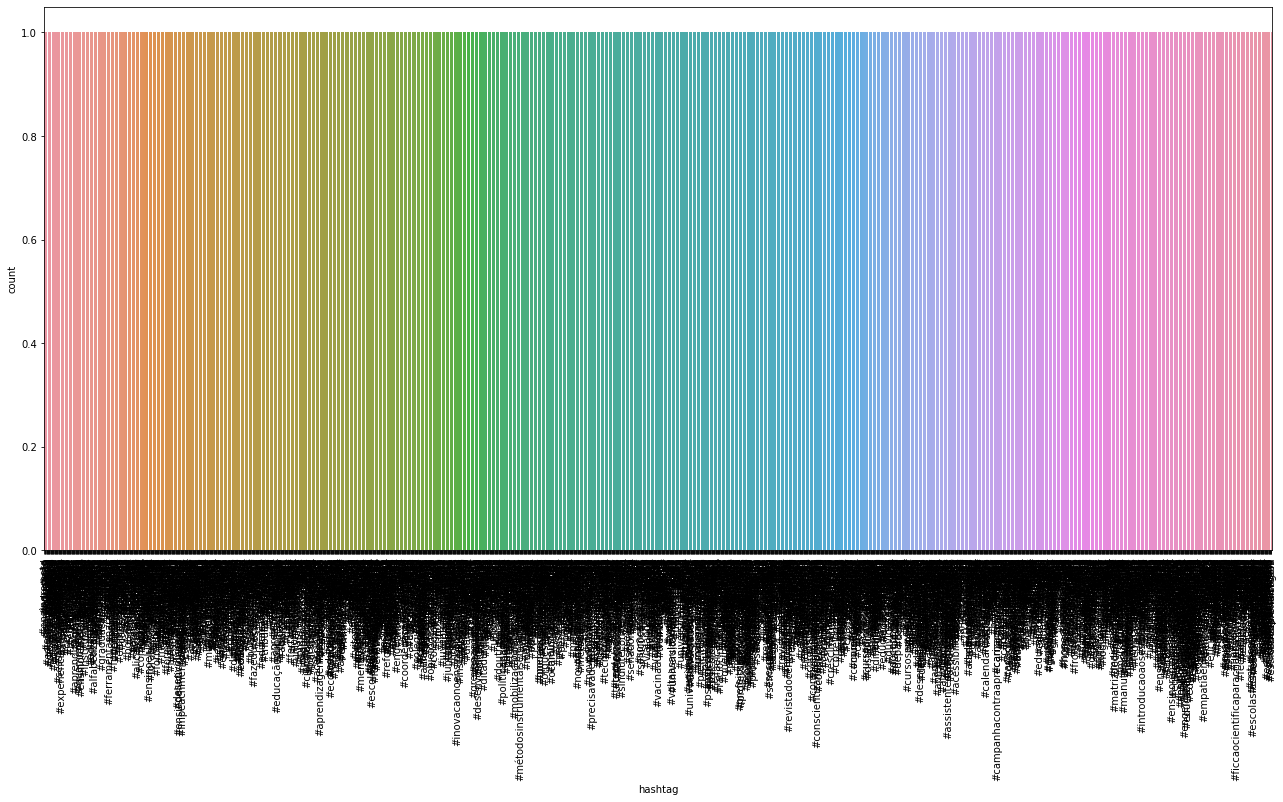

In [ ]:
# Top target countries
import seaborn as sns
import matplotlib.pyplot as plt

print(hashtags['hashtag'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(hashtags['hashtag'])
plt.xticks(rotation=90)
plt.show()

<Figure size 2160x1152 with 0 Axes>

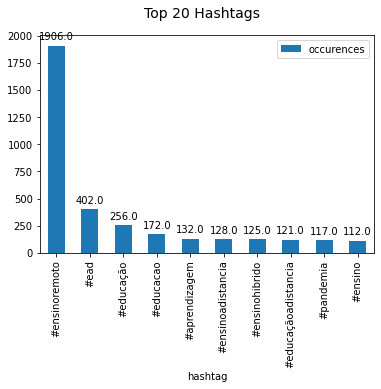

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 16))
splot = hashtags[:10].plot(kind='bar',y='occurences',x='hashtag')
#fig, ax = plt.subplots(figsize=(12, 8))
#plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 20 Hashtags', fontsize=14)
for p in splot.patches: 
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points') 
#https://datavizpyr.com/annotate-barplot-with-bar_label-in-matplotlib/

In [ ]:
type(hashtags)

pandas.core.frame.DataFrame

In [ ]:
hashtags.dtypes


hashtag        object
occurences    float64
dtype: object

In [ ]:
hashtags.head(10)

hashtag  occurences
822         #ensinoremoto      1906.0
628                  #ead       402.0
692             #educação       256.0
647             #educacao       172.0
126         #aprendizagem       132.0
781     #ensinoadistancia       128.0
801        #ensinohibrido       125.0
694   #educaçãoadistancia       121.0
1491            #pandemia       117.0
780               #ensino       112.0

In [ ]:
hashtags[:10]

hashtag  occurences
822         #ensinoremoto      1906.0
628                  #ead       402.0
692             #educação       256.0
647             #educacao       172.0
126         #aprendizagem       132.0
781     #ensinoadistancia       128.0
801        #ensinohibrido       125.0
694   #educaçãoadistancia       121.0
1491            #pandemia       117.0
780               #ensino       112.0

In [ ]:


hashtags[['hashtag','ocurrences']]

KeyError: ignored

In [ ]:
hashtags['hashtag'].value_counts()

#educacaomidiatica    1
#mptcampinas          1
#code                 1
#blendedlearning      1
#portalbemminas       1
                     ..
#pvporumbemmaior      1
#escolhas             1
#teambasedlearning    1
#covid__19            1
#fundacaoroge         1
Name: hashtag, Length: 2162, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


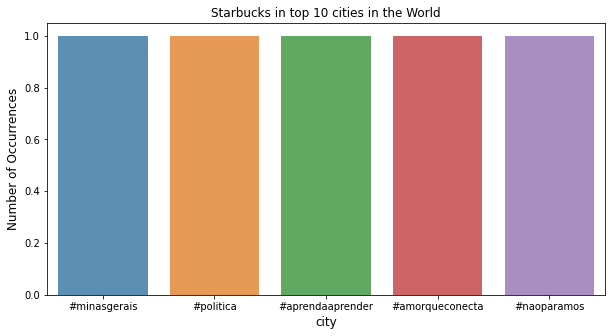

In [ ]:

city_count  = hashtags['hashtag'].value_counts()
city_count = city_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Starbucks in top 10 cities in the World')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()


In [ ]:



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
x = hashtags.head(10)
y = hashtags.occurences
plt.title('Top 10 #Hashtags')
plt.ylabel('#Hashtags', fontsize=12)

sns.barplot(x = "hashtag", y = "occurences", data = hashtags)

#splot= sns.barplot(x,y, data=hashtags);

#splot = hashtags[:10].plot(kind='bar',y='occurences',x='hashtag')
#for p in splot.patches:
#    splot.annotate(format(p.get_height(), '.1f'), 
#                   (p.get_x() + p.get_width() / 2., p.get_height()), 
#                   ha = 'center', va = 'center', 
#                   xytext = (0, 9), 
#                   textcoords = 'offset points')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


In [ ]:
plt.figure(figsize=(8, 6))
#hashtags[:10]
splot=sns.barplot(x="hashtag",y="occurences",data=hashtags:[10])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Continent", size=14)
plt.ylabel("LifeExp", size=14)

SyntaxError: ignored

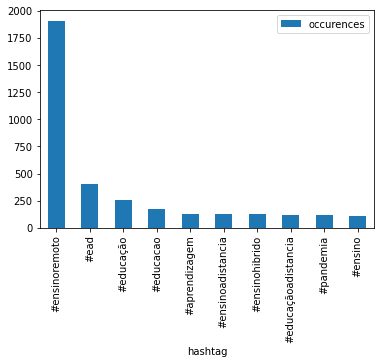

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#sns.barplot(x='hashtag.head(10)', y='occurences', data=hashtags,)
#sns.barplot(x='hashtag', y='occurences', data=hashtags,)
hashtags[:10].plot(x="hashtag", y="occurences", kind="bar")




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
x = hashtags.head(10)
y = occurences.head(10)
plt.title('Top 10 #Hashtags')
plt.ylabel('#Hashtags', fontsize=12)
splot= sns.barplot(x,y, data=hashtags);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

NameError: ignored

<Figure size 1440x576 with 0 Axes>

# Top 10 usuários

In [ ]:
# show the top ten languages & their counts
print(df['user_name'].value_counts().head(10))

# plot the counts for the top ten most commonly used languages
colors=sns.color_palette('hls', 10) 
pd.Series(df['user_name']).value_counts().head(10).plot(kind = "bar",
                                                        figsize=(12,9),
                                                        color=colors,
                                                        fontsize=8,
                                                        title = "Top 10 usuários")
# https://www.kaggle.com/mrisdal/most-commonly-used-natural-languages

Instituto de Desenho Instrucional                     85
Canal Atualidade em Foco #ForaBolsonaro               84
Fundação Lemann                                       61
jose claudio henrich                                  60
Ead Wyden Araçatuba                                   56
IFS Campus Aracaju                                    53
Marinhos vacinado (2 doses) e mascarado (N95/PFF2)    48
Demétrio Weber                                        36
Uesb                                                  31
Metha - Metodologias de Ensino em Ciências Humanas    30
Name: user_name, dtype: int64


In [ ]:
#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

hashtags[:10].plot(kind='bar',y='occurences',x='hashtag')
#users_count  = df['author.username'].value_counts()
#users_count = users_count[:10,]
plt.figure(figsize=(16,8))
sns.barplot(hashtags.index, hashtags.values, alpha=0.8)
plt.title('Top 10 usuários')
plt.ylabel('Number de ocorrências', fontsize=14)
plt.xlabel('Usuários', fontsize=14)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

hashtags[:10].plot(kind='bar',y='occurences',x='hashtag')

NameError: ignored

In [ ]:

df['text'].head(n=10)

0    A Comissão de Acompanhamento ao Trabalho/Ensin...
1    Zoom e outras reuniões pela Internet l"Se você...
2    Ensino remoto tá puxado pra todo mundo, né?\nT...
3    RT @ericbrasiln: Ensino remoto tá puxado pra t...
4    Diante dos desafios do nosso tempo, os educado...
5    RT @Oi_Futuro: Diante dos desafios do nosso te...
6    RT @Oi_Futuro: Diante dos desafios do nosso te...
7    RT @ericbrasiln: Ensino remoto tá puxado pra t...
8    Divulgar um canal educativo nunca é demais!!!\...
9    RT @quelliassis: Divulgar um canal educativo n...
Name: text, dtype: object

In [ ]:
#Top Words

import re
words = df['text'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']
#https://medium.com/analytics-vidhya/exploring-twitter-data-using-python-part-iii-analyzing-the-data-e883aa340dff

In [ ]:
words.head(10)

word  occurences
0    a      22067.0
9    s      19288.0
21   e      18758.0
3    t      16511.0
2    o      14743.0
1    n      14662.0
18   r      13487.0
5    i      12351.0
4    d      12104.0
7    c       9926.0

In [ ]:
import nltk
from nltk import bigrams
bigramseries = pd.Series([word for sublist in df['text'].dropna()\
                    .apply(lambda x: [i for i in bigrams(x)])\
                    .tolist() for word in sublist])\
                    .value_counts()

In [ ]:
bigramseries.head()

(o,  )    14053
(a,  )     9304
( , #)     8761
(e,  )     7655
(s,  )     7367
dtype: int64

In [ ]:
plt.suptitle('Top 10 Bigrams for keyword: BREXIT, locale: EN', fontsize=18)
bigramseries[:10].plot(kind='bar')

# 1.x Gráfico de hastags 

In [ ]:
# CONTAGEM Hashtags do dataset
#df.text.str.extractall(r'(\#\w+)')[0].value_counts()
df['first_five_Letter'] = df.text.str.extractall(r'(\#\w+)')[0].value_counts()

In [ ]:
df.first_five_Letter

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2886   NaN
2887   NaN
2888   NaN
2889   NaN
2890   NaN
Name: first_five_Letter, Length: 2891, dtype: float64

In [ ]:
df.head()

id                created_at  ... hashtag first_five_Letter
0  1416145479939805191  2021-07-16T21:19:27.000Z  ...      []               NaN
1  1415925194321969155  2021-07-16T06:44:07.000Z  ...      []               NaN
2  1415123734671810561  2021-07-14T01:39:24.000Z  ...      []               NaN
3  1415873994637598722  2021-07-16T03:20:40.000Z  ...      []               NaN
4  1415059480149204996  2021-07-13T21:24:05.000Z  ...      []               NaN

[5 rows x 95 columns]

In [ ]:
pd.set_option('display.max_columns', None)
print(df)

ss

In [ ]:
#Which user is most active on twitter

import matplotlib.pyplot as plt
import seaborn as sns
count=df['user_name'].value_counts()
df_count=pd.DataFrame()
df_count['user_name'] = count.index
df_count['activeCount'] = count.values
df_count = df_count.iloc[:50,:]
drawbarplot(x=df_count.activeCount,y=df_count.author.username,xlabel='count',title='Top 50 active user in given time span',figsize=(16,16))

NameError: ignored

In [ ]:
#barplot function

def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'terrain',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k',fontsize=10)
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()

In [ ]:
df.info
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#Which user is most active on twitter
count=df['author.username'].value_counts()
df_count=pd.DataFrame()
df_count['author.username'] = count.index
df_count['activeCount'] = count.values
df_count = df_count.iloc[:50,:]
drawbarplot(x=df_count.activeCount,y=df_count.author.username, xlabel='count',title='Top 50 active user in given time span',figsize=(16,16))

#https://www.kaggle.com/overload10/twitter-dataset-eda

AttributeError: ignored

In [ ]:
df.isnull().sum()

id                           0
created_at                   6
text                         0
attachments.media         2065
attachments.media_keys    2065
                          ... 
__twarc.version              0
Unnamed: 91               3060
text_new                     0
hashtag                      0
first_five_Letter         3060
Length: 95, dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

id                        0
created_at                0
text                      0
attachments.media         0
attachments.media_keys    0
                         ..
__twarc.retrieved_at      0
__twarc.url               0
__twarc.version           0
Unnamed: 91               0
first_five_Letter         0
Length: 93, dtype: int64

In [ ]:
df.shape  

(0, 93)

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])

In [ ]:
df.info #resolver parei em 06/07/2021
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#Which user is most active on twitter
count=df['user_name'].value_counts()
df_count=pd.DataFrame()
df_count['user_name'] = count.index
df_count['activeCount'] = count.values
df_count = df_count.iloc[:50,:]
drawbarplot(x=df_count.activeCount,y=df.author.username,xlabel='count',title='Top 50 active user in given time span',figsize=(16,16))

#https://www.kaggle.com/overload10/twitter-dataset-eda

AttributeError: ignored

In [ ]:

#df.info()

#Favoritos top 10 tweets
top_ten_tweets = df['favorite_count'].sort_values(ascending=False).head(10) # returns a df with first column = index, second column = tweet
top_ten_tweets

#print(id + "'s top 5 tweets (using favorite count)" + "\n")
#for i in range(5):
#    index = top_ten_tweets.index[i]
#    print(str(i+1) + ")" + df.iloc[index]['text'])
#    print("Favorite count: " + str(df.iloc[index]['favorite_count']) + "\n")

# retomar: https://4bic.github.io/2018-07-21-healthX_twitter_analysis/
#https://benalexkeen.com/resampling-time-series-data-with-pandas/
#https://medium.com/dataexplorations/thoughts-on-visionzero-first-steps-with-the-twitter-api-and-word2vec-for-text-analysis-e766ed6b55ab
#https://github.com/sergiers3/Mariano-Rajoy-Twitter-analysis-tutorial
#http://jurgens.people.si.umich.edu/tutorials/Mapping_Word_Frequencies_on_Twitter_using_Python.html


KeyError: ignored

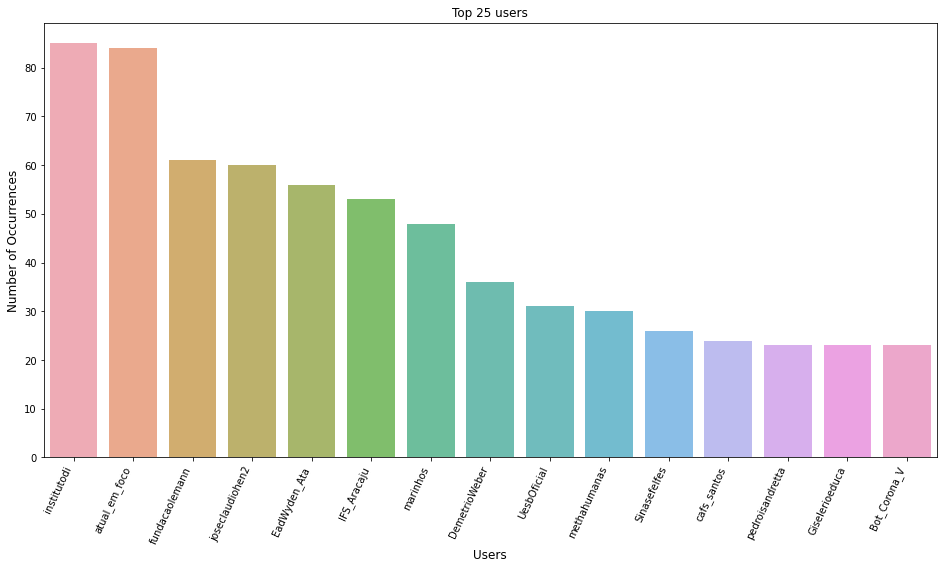

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
users_count  = df['user_screen_name'].value_counts()
users_count = users_count[:15,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values, alpha=0.8)
plt.title('Top 15 usuários)
plt.ylabel('Número ocorrência', fontsize=12)
plt.xlabel('Usuários', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

#https://github.com/dariaminsky/belarusian-twitter/blob/master/EDA.ipynb

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 51 non-null     object 
 1   created_at                  2891 non-null   object 
 2   hashtags                    2059 non-null   object 
 3   media                       926 non-null    object 
 4   urls                        1222 non-null   object 
 5   favorite_count              2891 non-null   int64  
 6   id                          2891 non-null   int64  
 7   in_reply_to_screen_name     165 non-null    object 
 8   in_reply_to_status_id       159 non-null    float64
 9   in_reply_to_user_id         165 non-null    float64
 10  lang                        2891 non-null   object 
 11  place                       83 non-null     object 
 12  possibly_sensitive          1667 non-null   object 
 13  retweet_count               2891 

In [ ]:
#df["created_at"] = df["created_at"].astype('datetime64[ns]') 
#df["created_at"] = df.created_at.dt.to_pydatetime()
df["created_at"] = pd.to_datetime(df['created_at'])

In [ ]:
df['created_at'] = pd.to_datetime(df.created_at)

In [ ]:
df['created_at'] 

0      2021-07-15 02:10:48+00:00
1      2021-07-19 18:10:09+00:00
2      2021-07-14 20:19:12+00:00
3      2021-07-21 13:31:27+00:00
4      2021-07-23 16:40:45+00:00
                  ...           
2886   2020-04-29 14:24:23+00:00
2887   2020-03-21 11:50:02+00:00
2888   2020-04-29 22:03:41+00:00
2889   2020-04-07 20:26:42+00:00
2890   2020-04-29 22:22:21+00:00
Name: created_at, Length: 2891, dtype: datetime64[ns, UTC]

In [ ]:
df.isna().sum()

id                        0
created_at                0
text                      0
attachments.media         0
attachments.media_keys    0
                         ..
__twarc.version           0
Unnamed: 91               0
text_new                  0
hashtag                   0
first_five_Letter         0
Length: 95, dtype: int64

In [ ]:
df["created_at"]

0      2021-07-16 21:19:27+00:00
1      2021-07-16 06:44:07+00:00
2      2021-07-14 01:39:24+00:00
3      2021-07-16 03:20:40+00:00
4      2021-07-13 21:24:05+00:00
                  ...           
3055   2020-04-02 06:21:48+00:00
3056   2020-04-02 06:14:23+00:00
3057   2020-03-30 14:36:46+00:00
3058   2020-03-21 11:15:29+00:00
3059   2020-03-21 11:50:02+00:00
Name: created_at, Length: 2326, dtype: datetime64[ns, UTC]

In [ ]:
# x contained NaN
df = df[df['created_at'].isnull()]

In [ ]:
df['created_at'].replace('','0',inplace=True)
df['created_at'].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


236   -9223372036854775808
Name: created_at, dtype: int64

In [ ]:
df['YearMonth'] = pd.to_datetime(df['created_at']).apply(lambda x: int(f'{x.year}{x.month}'))

In [ ]:
#Contagem do Tuites mais antigo ao mais novo
print("Data twitter mais antigo:  ",df.created_at.min())
print("-----")
print("Data twitter mais novo  :  ",df.created_at.max())

#reactions = df.groupby(['created_at']).count()
#ax = reactions.replies.plot(figsize=(15,6),ls='--',c='red')
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

Data twitter mais antigo:   2020-03-21 11:50:02+00:00
-----
Data twitter mais novo  :   2021-07-27 17:48:24+00:00


In [ ]:
# Gráfico de volume de postages
# Convert the created_at column to np.datetime object
df['created_at'] = pd.to_datetime(df['created_at'])

df.set_index('created_at').resample('D').text.count().plot(color='r')


#Analisar os dados.. Tentar fazer script para contar twuites agregados de um mes

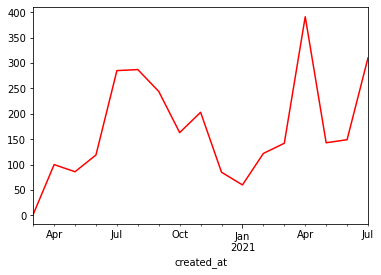

In [ ]:
df.set_index('created_at').resample('M').text.count().plot(color='r')

# Source  Post

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   coordinates                 51 non-null     object             
 1   created_at                  2891 non-null   datetime64[ns, UTC]
 2   hashtags                    2059 non-null   object             
 3   media                       926 non-null    object             
 4   urls                        1222 non-null   object             
 5   favorite_count              2891 non-null   int64              
 6   id                          2891 non-null   int64              
 7   in_reply_to_screen_name     165 non-null    object             
 8   in_reply_to_status_id       159 non-null    float64            
 9   in_reply_to_user_id         165 non-null    float64            
 10  lang                        2891 non-null   object          

In [ ]:
df['source'].head()


0    <a href="http://twitter.com/download/android" ...
1    <a href="https://mobile.twitter.com" rel="nofo...
2    <a href="http://twitter.com/download/android" ...
3    <a href="https://mobile.twitter.com" rel="nofo...
4    <a href="http://twitter.com/download/android" ...
Name: source, dtype: object

In [ ]:
#ANALISE ORIGEM POST

df['source'].head()
# first extracting the client name including the >< characters
for source in df['source']:
    df['source'] = df['source'].str.extract('(\>.*\<)', expand=False) #output example: '>Twitter for Android<'
    
# after that extracting only the letters
for source in df['source']:
    df['source'] = df['source'].str.extract('([a-zA-Z ]+)', expand=False) #output example: 'Twitter for Android'

# get the value counts for source column
df['source'].value_counts()



Twitter Web App             889
Twitter for Android         885
Twitter for iPhone          485
Instagram                   184
mLabs                        95
Etus Brasil                  66
TweetDeck                    53
Hootsuite Inc                44
Twitter for iPad             38
Alpha                        23
Buffer                       17
gabge                        11
Microsoft Power Platform     10
QuarentenaBot                 8
IFTTT                         7
Twitter for Advertisers       7
HubSpot                       5
LinkedIn                      5
Rob                           5
SociabbleApp                  5
Twitter Media Studio          4
Twitter Web Client            4
Portal dcmais                 3
Blog                          3
Spreaker                      3
LaterMedia                    3
Paper                         2
botlabhd                      2
Sprinklr Publishing           2
Zoho Social                   2
ClioVis                       2
WordPres

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
users_count  = df['source'].value_counts()
users_count = users_count[:15,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values, alpha=0.8)
plt.title('Top 10 Fontes de postagem')
plt.ylabel('Número ocorrência', fontsize=12)
plt.xlabel('Usuários', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

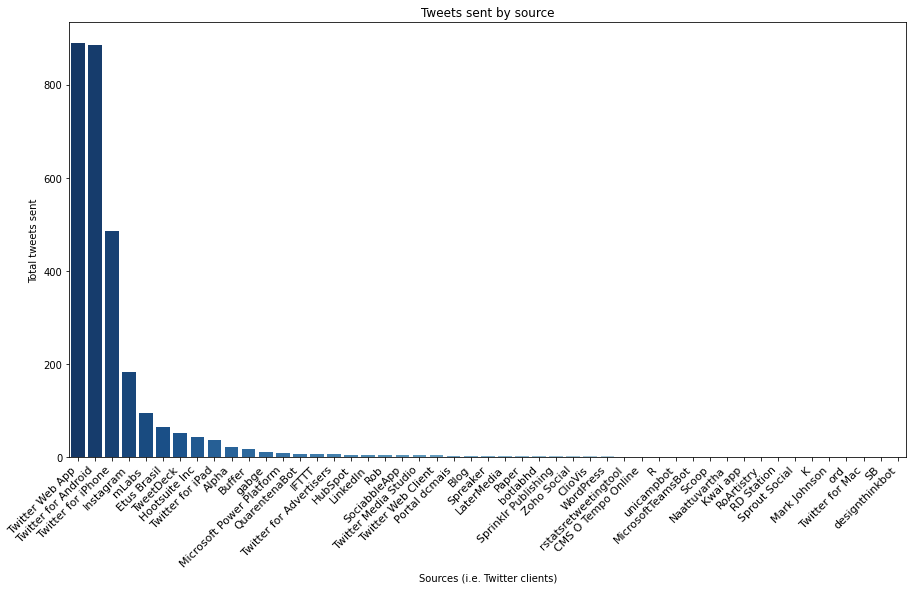

In [ ]:
#gráfico de origem dos posts
# get the value counts for source column
import seaborn as sns

df['source'].value_counts()

# plot the above data
# set the figure size
plt.figure(figsize=(15,8))

# create a countplot, ordered by count
sns.countplot(x='source', data=df, palette = 'Blues_r' , order = df['source'].value_counts().index)

# rotate the ticks for better readability
plt.xticks(rotation=45, fontsize='11', horizontalalignment='right')

# set the labels and title
plt.xlabel('Sources (i.e. Twitter clients)')
plt.ylabel('Total tweets sent')
plt.title('Tweets sent by source');

In [ ]:
print(df['source'])

0       Twitter for Android
1           Twitter Web App
2       Twitter for Android
3           Twitter Web App
4       Twitter for Android
               ...         
2886     Twitter for iPhone
2887       Twitter for iPad
2888        Twitter Web App
2889        Twitter Web App
2890        Twitter Web App
Name: source, Length: 2891, dtype: object


# Datas

In [ ]:
df.head()

coordinates                created_at  ... first_five_Letter YearMonth
0         NaN 2021-07-15 02:10:48+00:00  ...               NaN     20217
1         NaN 2021-07-19 18:10:09+00:00  ...               NaN     20217
2         NaN 2021-07-14 20:19:12+00:00  ...               NaN     20217
3         NaN 2021-07-21 13:31:27+00:00  ...               NaN     20217
4         NaN 2021-07-23 16:40:45+00:00  ...               NaN     20217

[5 rows x 36 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 51 non-null     object 
 1   created_at                  2891 non-null   object 
 2   hashtags                    2059 non-null   object 
 3   media                       926 non-null    object 
 4   urls                        1222 non-null   object 
 5   favorite_count              2891 non-null   int64  
 6   id                          2891 non-null   int64  
 7   in_reply_to_screen_name     165 non-null    object 
 8   in_reply_to_status_id       159 non-null    float64
 9   in_reply_to_user_id         165 non-null    float64
 10  lang                        2891 non-null   object 
 11  place                       83 non-null     object 
 12  possibly_sensitive          1667 non-null   object 
 13  retweet_count               2891 

In [ ]:
# Set datetime
from datetime import datetime
df['created_at'] = pd.to_datetime(df['created_at'])

In [ ]:
df.set_index('user_created_at', inplace = True)

KeyError: ignored

In [ ]:
df.head()

coordinates  ... user_verified
0         NaN  ...         False
1         NaN  ...         False
2         NaN  ...         False
3         NaN  ...         False
4         NaN  ...         False

[5 rows x 34 columns]

In [ ]:
df.index

RangeIndex(start=0, stop=2891, step=1)

In [ ]:
df['created_at']


0      2021-07-15 02:10:48+00:00
1      2021-07-19 18:10:09+00:00
2      2021-07-14 20:19:12+00:00
3      2021-07-21 13:31:27+00:00
4      2021-07-23 16:40:45+00:00
                  ...           
2886   2020-04-29 14:24:23+00:00
2887   2020-03-21 11:50:02+00:00
2888   2020-04-29 22:03:41+00:00
2889   2020-04-07 20:26:42+00:00
2890   2020-04-29 22:22:21+00:00
Name: created_at, Length: 2891, dtype: datetime64[ns, UTC]

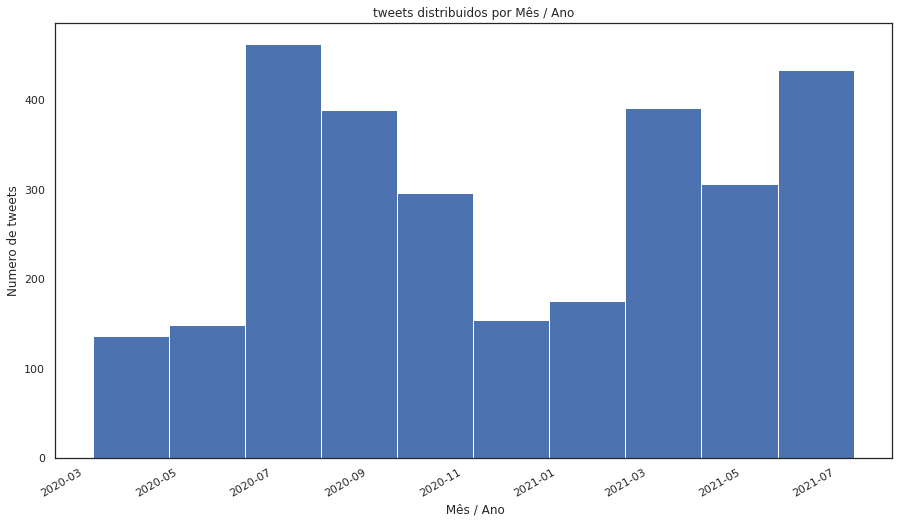

In [ ]:
# Visualising tweet distribution over time
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# In our dataset, we have a column created_at, which saves the timestemp of tweets
# We will plot two figures using the column
#df['user_created_at '] = df['user_created_at '].apply(pd.to_datetime)
df['date'] = df['created_at'].dt.date
sns.set(style='white')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
plt.hist(x="date", data=df)
#plt.hist(x="date", data=df,histtype='step')
ax.set(xlabel=" Mês / Ano",
       ylabel="Numero de tweets",
       title="tweets distribuidos por Mês / Ano")
plt.xticks(rotation=30)
plt.show()

#tentar alterar outro gráfico do SNS ou maltplot

In [ ]:
#Criar campo no dataframe mes-ano
df['mes_ano'] = pd.to_datetime(df['created_at']).dt.to_period('M')
df.head()

coordinates                created_at  ...        date  mes_ano
0         NaN 2021-07-15 02:10:48+00:00  ...  2021-07-15  2021-07
1         NaN 2021-07-19 18:10:09+00:00  ...  2021-07-19  2021-07
2         NaN 2021-07-14 20:19:12+00:00  ...  2021-07-14  2021-07
3         NaN 2021-07-21 13:31:27+00:00  ...  2021-07-21  2021-07
4         NaN 2021-07-23 16:40:45+00:00  ...  2021-07-23  2021-07

[5 rows x 38 columns]

In [ ]:
#filtrar dataframe por ID, Text e Mes-ano
df[['id','text','mes_ano']]

id  ...  mes_ano
0     1415494024824229890  ...  2021-07
1     1417185003486732289  ...  2021-07
2     1415405541275308034  ...  2021-07
3     1417839642280345606  ...  2021-07
4     1418612057323225093  ...  2021-07
...                   ...  ...      ...
2886  1255503199093567489  ...  2020-04
2887  1241331230106431496  ...  2020-03
2888  1255618786583097345  ...  2020-04
2889  1247621847778299905  ...  2020-04
2890  1255623483935121414  ...  2020-04

[2891 rows x 3 columns]

In [ ]:
# Total de postagens por dia
import pandas as pd
import dateutil
df['created_at'].value_counts()

# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#https://www.dataquest.io/blog/python-datetime-tutorial/

2020-11-05 14:49:49+00:00    2
2020-09-26 15:00:01+00:00    2
2021-02-17 10:29:49+00:00    2
2020-04-24 00:57:14+00:00    2
2020-10-23 00:59:58+00:00    2
                            ..
2020-09-18 11:29:06+00:00    1
2021-04-12 12:33:51+00:00    1
2020-09-04 17:58:40+00:00    1
2020-06-27 12:30:07+00:00    1
2020-09-23 21:49:53+00:00    1
Name: created_at, Length: 2882, dtype: int64

In [ ]:
# Total de postagens por mê
print('O tal de posts acumulados por mês é: ')
df['mes_ano'].value_counts()



O tal de posts acumulados por mês é: 


2021-04    391
2021-07    310
2020-08    287
2020-07    285
2020-09    244
2020-11    203
2020-10    163
2021-06    149
2021-05    143
2021-03    142
2021-02    122
2020-06    119
2020-04    100
2020-05     86
2020-12     85
2021-01     60
2020-03      2
Freq: M, Name: mes_ano, dtype: int64

In [ ]:
df.mes_ano 

0       2021-07
1       2021-07
2       2021-07
3       2021-07
4       2021-07
         ...   
2886    2020-04
2887    2020-03
2888    2020-04
2889    2020-04
2890    2020-04
Name: mes_ano, Length: 2891, dtype: period[M]

Gráfico Tweets acumulado por mês

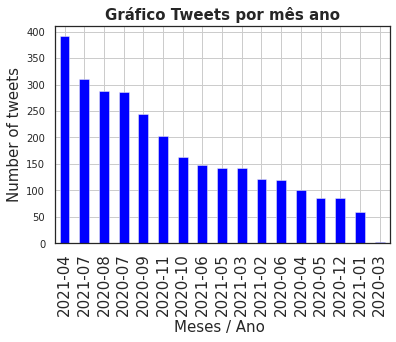

In [ ]:
import matplotlib.pyplot as plt
#Grafico de tweets acumulados por mês / ano


mes_ano_acumulado= df['mes_ano'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Meses / Ano ', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Gráfico Tweets por mês ano', fontsize=15, fontweight='bold')
plt.style.use('fivethirtyeight')
mes_ano_acumulado[:25].plot(ax=ax, kind='bar', color='blue')
#plt.plot(df[mes_ano_acumulado])
#https://www.listendata.com/2019/06/matplotlib-tutorial-learn-plot-python.html
#https://pbpython.com/groupby-agg.html

In [ ]:
df.groupby('mes_ano', as_index=False).agg({"text": "sum"})

mes_ano                                               text
0   2020-03  A ironia provocada pelo novo coronavírus.\nNa ...
1   2020-04  RT @AppleEDU: Com produtos Apple, os educadore...
2   2020-05  A pandemia nos colocou frente a inúmeras trans...
3   2020-06  RT @fundacaolemann: Ao lado da @ImaginableFut ...
4   2020-07  PLANOS PROMOCIONAIS! https://t.co/Ret02awXmF #...
5   2020-08  Estudantes da Unirio podem se inscrever no edi...
6   2020-09  Uma das aulas que mais curto ministrar, hoje e...
7   2020-10  RT @Educadorsec21: A Abed realizou uma pesquis...
8   2020-11  RT @vidadeservidor_: Um desabafo que resume a ...
9   2020-12  O #ensinoremoto foi um dos grandes desafios pa...
10  2021-01  RT @AlticeEmpresas: Conectividade, equipamento...
11  2021-02  RT @paulasouzasp: ⚠ Atenção, fatecanos!\n\nA r...
12  2021-03  Estudantes participam de bate-papo sobre hábit...
13  2021-04  Voltar às aulas presenciais, na rede pública, ...
14  2021-05  Agende já o seu Horário!!!\n\n#coaching #carre...
15  2021-06  Cuidado com as balas de prata quando falamos d...
16  2021-07  RT @ericbrasiln: Ensino remoto tá puxado pra t...

In [ ]:
df['mes_ano'].count()

2891

In [ ]:
df.plot(x="mes_ano",   kind="line")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f492f870560> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [ ]:
#contar quantidade de informações do Dataframe
df.count()

# Total tweets
print ('Total tweets this period:', len(df.index), '\n')



Total tweets this period: 2891 



# Diversos

In [ ]:
#https://github.com/smlabto/TwitterEDA/blob/main/SMLab_TwitterEDA_June2021.ipynb

In [ ]:
df["lang"].unique()

array(['pt', 'es', 'und', 'en', 'in', 'lt', 'it'], dtype=object)

In [ ]:
#How many different languages used in the tweets?
len(df["lang"].unique())

7

In [ ]:
#Top 10 most used languages
df_en_count = df.groupby("lang")['id'].count().reset_index(name="count").sort_values('count',ascending=False).head(10)
df_en_count

lang  count
5   pt   2599
6  und    264
1   es     16
0   en      9
2   in      1
3   it      1
4   lt      1

In [ ]:
top_countries = df.lang.value_counts().head(15)
top_countries

pt     2599
und     264
es       16
en        9
lt        1
in        1
it        1
Name: lang, dtype: int64

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Linguagens do texto no Corpus')
ax =sns.barplot(x=top_countries.index, y=top_countries);
plt.show()

In [ ]:
#Filter dataframe for tweets only in english language
df_en = df[df['lang']=='pt']
df_en.head()

coordinates                created_at  ... user_verified  mes_ano
0         NaN 2021-07-15 02:10:48+00:00  ...         False  2021-07
1         NaN 2021-07-19 18:10:09+00:00  ...         False  2021-07
2         NaN 2021-07-14 20:19:12+00:00  ...         False  2021-07
3         NaN 2021-07-21 13:31:27+00:00  ...         False  2021-07
4         NaN 2021-07-23 16:40:45+00:00  ...         False  2021-07

[5 rows x 35 columns]

In [ ]:
df.isna().sum()

coordinates                   2840
created_at                       0
hashtags                       832
media                         1965
urls                          1669
favorite_count                   0
id                               0
in_reply_to_screen_name       2726
in_reply_to_status_id         2732
in_reply_to_user_id           2726
lang                             0
place                         2808
possibly_sensitive            1224
retweet_count                    0
retweet_id                    1792
retweet_screen_name           1792
source                           0
text                             0
tweet_url                        0
user_created_at                  0
user_screen_name                 0
user_default_profile_image       0
user_description               228
user_favourites_count            0
user_followers_count             0
user_friends_count               0
user_listed_count                0
user_location                  659
user_name           

In [ ]:
import re
import string

def clean_text(text):
    """
    Function to clean the text.
    
    Parameters:
    text: the raw text as a string value that needs to be cleaned
    
    Returns:
    cleaned_text: the cleaned text as string
    """
    # convert to lower case
    cleaned_text = text.lower()
    # remove HTML tags
    html_pattern = re.compile('<.*?>')
    cleaned_text = re.sub(html_pattern, '', cleaned_text)
    # remove punctuations
    cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation))
    
    return cleaned_text.strip()

In [ ]:
df['text_limpo'] = df['text'].apply(clean_text)

In [ ]:
df['text']

0       RT @ericbrasiln: Ensino remoto tá puxado pra t...
1       O https://t.co/CqK5AUdGw5 traz as ações dos es...
2       RT @ericbrasiln: Ensino remoto tá puxado pra t...
3       GUIA DE SERVIÇOS 📋\n\nFique ligado, estudante!...
4       https://t.co/p48fOQfs0I\n\nAprendendo matemáti...
                              ...                        
2886    RT @AppleEDU: Apresentando a Apple Education L...
2887    É a verdade, incomode a quem incomodar.\nEs la...
2888    Para gravar as suas aulas ou pedir tarefas aos...
2889    Estamos juntos com a Fundação 1BI e com a @Ima...
2890    Tire. suas dúvidas sobre como configurar o App...
Name: text, Length: 2891, dtype: object

In [ ]:
df['text_limpo']

0       rt ericbrasiln ensino remoto tá puxado pra tod...
1       o httpstcocqk5audgw5 traz as ações dos estados...
2       rt ericbrasiln ensino remoto tá puxado pra tod...
3       guia de serviços 📋\n\nfique ligado estudante r...
4       httpstcop48foqfs0i\n\naprendendo matemática de...
                              ...                        
2886    rt appleedu apresentando a apple education lea...
2887    é a verdade incomode a quem incomodar\nes la v...
2888    para gravar as suas aulas ou pedir tarefas aos...
2889    estamos juntos com a fundação 1bi e com a imag...
2890    tire suas dúvidas sobre como configurar o appl...
Name: text_limpo, Length: 2891, dtype: object

In [ ]:
df[['text', 'text_limpo']]

text                                         text_limpo
0     RT @ericbrasiln: Ensino remoto tá puxado pra t...  rt ericbrasiln ensino remoto tá puxado pra tod...
1     O https://t.co/CqK5AUdGw5 traz as ações dos es...  o httpstcocqk5audgw5 traz as ações dos estados...
2     RT @ericbrasiln: Ensino remoto tá puxado pra t...  rt ericbrasiln ensino remoto tá puxado pra tod...
3     GUIA DE SERVIÇOS 📋\n\nFique ligado, estudante!...  guia de serviços 📋\n\nfique ligado estudante r...
4     https://t.co/p48fOQfs0I\n\nAprendendo matemáti...  httpstcop48foqfs0i\n\naprendendo matemática de...
...                                                 ...                                                ...
2886  RT @AppleEDU: Apresentando a Apple Education L...  rt appleedu apresentando a apple education lea...
2887  É a verdade, incomode a quem incomodar.\nEs la...  é a verdade incomode a quem incomodar\nes la v...
2888  Para gravar as suas aulas ou pedir tarefas aos...  para gravar as suas aulas ou pedir tarefas aos...
2889  Estamos juntos com a Fundação 1BI e com a @Ima...  estamos juntos com a fundação 1bi e com a imag...
2890  Tire. suas dúvidas sobre como configurar o App...  tire suas dúvidas sobre como configurar o appl...

[2891 rows x 2 columns]

In [ ]:
df['review_ls'] = df['text_limpo'].apply(lambda x: x.split(" "))
df.head()

coordinates  ...                                          review_ls
0         NaN  ...  [rt, ericbrasiln, ensino, remoto, tá, puxado, ...
1         NaN  ...  [o, httpstcocqk5audgw5, traz, as, ações, dos, ...
2         NaN  ...  [rt, ericbrasiln, ensino, remoto, tá, puxado, ...
3         NaN  ...  [guia, de, serviços, 📋\n\nfique, ligado, estud...
4         NaN  ...  [httpstcop48foqfs0i\n\naprendendo, matemática,...

[5 rows x 36 columns]

In [ ]:
import itertools
# positive reviews
positive_reviews = reviews_df[reviews_df['sentiment']=='positive']['review_ls']
print("Total positive reviews: ", len(positive_reviews))
positive_reviews_words = list(itertools.chain(*positive_reviews))
print("Total words in positive reviews:", len(positive_reviews_words))
# negative reviews
negative_reviews = reviews_df[reviews_df['sentiment']=='negative']['review_ls']
print("Total negative reviews: ", len(negative_reviews))
negative_reviews_words = list(itertools.chain(*negative_reviews))
print("Total words in negative reviews:", len(negative_reviews_words))

# https://datascienceparichay.com/article/python-frequency-of-each-word-in-string/

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import toolz as fp
import nltk
import warnings
# configuration
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'svg' 
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
nltk.download('rslp')
nltk.download('stopwords');

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['text'] = df['text'].astype(str)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

en_stopws = stopwords.words('english')  # this loads the default stopwords list for English
en_stopws.append('spam')  # add any words you don't like to the list
en_stopws.append('https') 

tweet_words = nltk.tokenize.word_tokenize(df["text"].drop_duplicates().str.lower().str.cat(sep=" ")) # separa em palavras
word_dist = fp.pipe(fp.keyfilter(lambda x: len(x) > 3, nltk.FreqDist(tweet_words)), # apenas palavras com mais de 3 caracteres
                    nltk.probability.FreqDist)

tokens = [token for token in word_dist if token not in en_stopws]  # filter stopwords
fdist = FreqDist(word_dist)
common = fdist.most_common(100)

#fig, ax = plt.subplots(figsize=(10, 7))

#(pd.DataFrame(word_dist.most_common(25)[::-1],
#              columns=['word', 'frequency'])
#    .plot.barh(x="word", y="frequency", ax=ax));

#https://towardsdatascience.com/feature-engineering-with-nltk-for-nlp-and-python-82f493a937a0


Word			Normalized Frequency


TypeError: ignored

In [ ]:

tweet_words = nltk.tokenize.word_tokenize(df["text"].drop_duplicates().str.lower().str.cat(sep=" ")) # separa em palavras
word_dist = fp.pipe(fp.keyfilter(lambda x: len(x) > 3, nltk.FreqDist(tweet_words)), # apenas palavras com mais de 3 caracteres
                    nltk.probability.FreqDist)


fig, ax = plt.subplots(figsize=(10, 7))

(pd.DataFrame(word_dist.most_common(25)[::-1],
              columns=['word', 'frequency'])
    .plot.barh(x="word", y="frequency", ax=ax));

# remove https  do gráfico

In [ ]:
df.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'text_limpo', 'review_ls'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

#Quais são os usuários que mais publicaram tweets, e quantos tweets publicaram?
fig, ax = plt.subplots(figsize=(10, 7))
(df
     .groupby("user_screen_name")
     .agg({"author.public_metrics.tweet_count": "count"})
     .sort_values(by="author.public_metrics.tweet_count", ascending=False)
     .head(25).plot.barh(ax=ax));

SpecificationError: ignored

# wordcloud

In [ ]:
#lowercase the column names
df.columns = df.columns.str.lower()
df.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'date'],
      dtype='object')

In [ ]:
df1=df[['text']]

In [ ]:

def clean_data(text):
    text = text.lower()  # convert all the text into lowercase
    text = text.strip()  #remove starting and trailing whitespaces
    special_char_reg = '([a-zA-Z0-9]+)' + '[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]' + '([a-zA-Z0-9]+)'
    text = re.sub(special_char_reg, ' ', text)
    text = re.sub(r'\s+', ' ', text) #remove all line formattings
    text = re.sub(r'\d+', '', text) #remove digits
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    #text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = ''.join(c for c in text if c not in string.punctuation)   #remove pecial symbols from job titles
    return text


In [ ]:
df['text']

236     nan
795     nan
1102    nan
1701    nan
1848    nan
2778    nan
Name: text, dtype: object

In [ ]:
df['text'] = df['text'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import re
tweet_df = df.text.apply(lambda x : clean_data(x))

NameError: ignored

In [ ]:
docs = df['text']
docs.head()

In [ ]:
docs = df['text'].str.lower().str.replace('[^a-z\s#@]', '') # remove everything other than alphabets, spaces, # , @
docs_tokens = docs.str.split(' ')

tokens_all = []
for tokens in docs_tokens:
    tokens_all.extend(tokens)
print('No. of tokens in entire corpus:', len(tokens_all))

TypeError: ignored

In [ ]:
df.text.value_counts

<bound method IndexOpsMixin.value_counts of 0       RT @ericbrasiln: Ensino remoto tá puxado pra t...
1       O https://t.co/CqK5AUdGw5 traz as ações dos es...
2       RT @ericbrasiln: Ensino remoto tá puxado pra t...
3       GUIA DE SERVIÇOS 📋\n\nFique ligado, estudante!...
4       https://t.co/p48fOQfs0I\n\nAprendendo matemáti...
                              ...                        
2886    RT @AppleEDU: Apresentando a Apple Education L...
2887    É a verdade, incomode a quem incomodar.\nEs la...
2888    Para gravar as suas aulas ou pedir tarefas aos...
2889    Estamos juntos com a Fundação 1BI e com a @Ima...
2890    Tire. suas dúvidas sobre como configurar o App...
Name: text, Length: 2891, dtype: object>

In [ ]:
text = " ".join(text for text in df.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 536820 words in the combination of all review.


In [ ]:
# common words 05/07/2021 
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

all_words = ' '.join([text for text in df['text']])
stop_words = ["earte","https", "co", "RT", "de", "que","só","tea_earte","isso", "esse",]              + list(STOPWORDS)
#stop_words = nltk.corpus.stopwords.words("portuguese")
#stopwords = set(stopwords)
#stopwords.update(["earte", "nan", "tea_earte", "rt", "orbit",
#                  "em", "não", "https","de","que"])

from wordcloud import WordCloud
wordcloud = WordCloud(stopwords = stop_words, max_words=100, width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(14, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#https://github.com/sharmaroshan/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (10,7))
#sns.countplot(data['Gender']
#sns.countplot(y= 'palavras', order=df['text'].value_counts().iloc[:10].index)
sns.countplot(y= df['text'], order=df['text'].value_counts().iloc[:10].index)

plt.title('As 10 palavra-chaves mais usadas no dataset de treino')
#matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128210 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128210 missing from current font.
  font.set_text(s, 0, flags=flags)


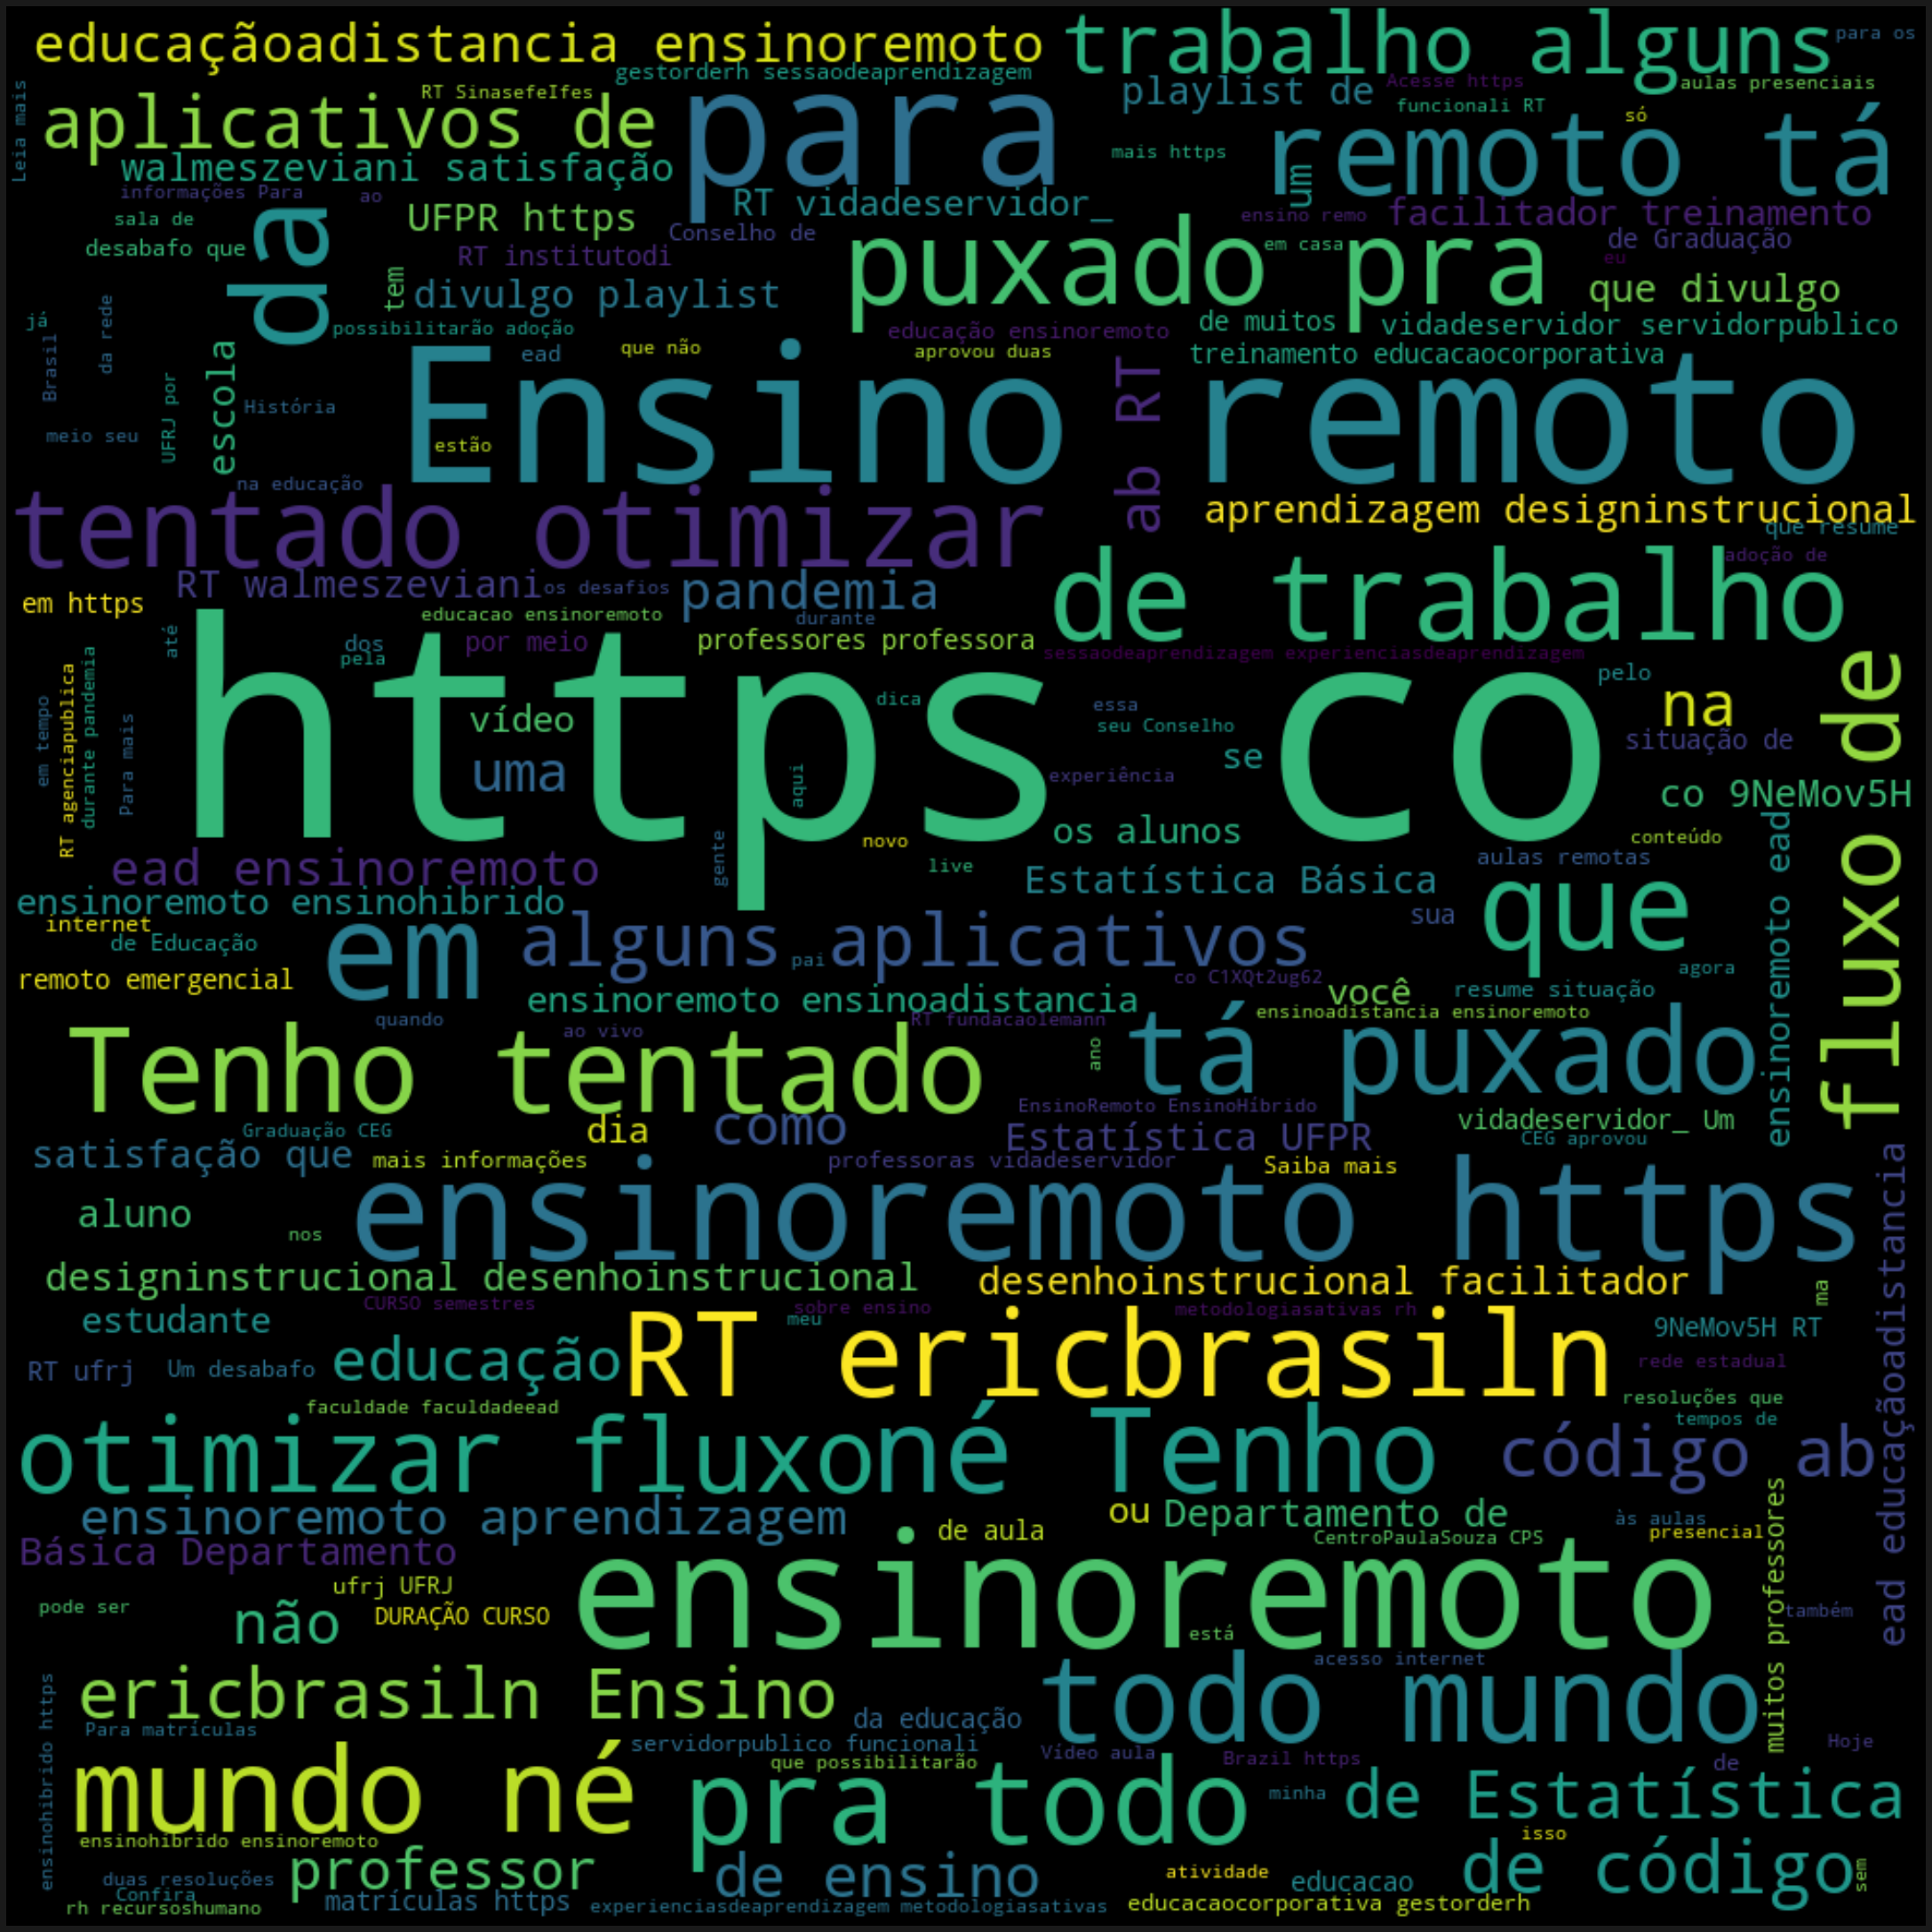

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#text = df.text.values
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df['text'] = df['text'].astype(str)
#df['text'].str.lower()
df['text']

0       A Comissão de Acompanhamento ao Trabalho/Ensin...
1       Zoom e outras reuniões pela Internet l"Se você...
2       Ensino remoto tá puxado pra todo mundo, né?\nT...
3       RT @ericbrasiln: Ensino remoto tá puxado pra t...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisação, não inovação educ...
3057    A ironia provocada pelo novo coronavírus.\nNa ...
3058    En una semana todos los docentes trabajando te...
3059    É a verdade, incomode a quem incomodar.\nEs la...
Name: text, Length: 3060, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               3060 non-null   int64  
 1   created_at                                       3054 non-null   object 
 2   text                                             3060 non-null   object 
 3   attachments.media                                995 non-null    object 
 4   attachments.media_keys                           995 non-null    object 
 5   attachments.poll.duration_minutes                4 non-null      float64
 6   attachments.poll.end_datetime                    4 non-null      object 
 7   attachments.poll.id                              4 non-null      float64
 8   attachments.poll.options                         4 non-null      object 
 9   attachments.poll.voting_status

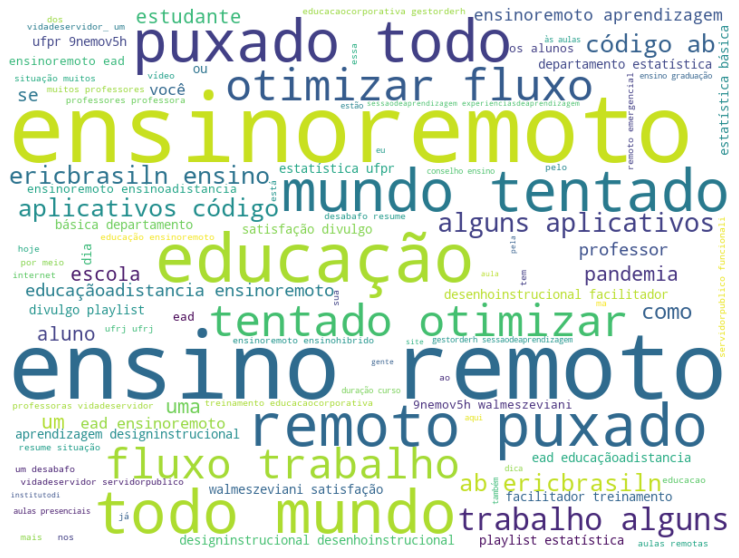

In [ ]:
# stopwords do not appear in the wordcloud.
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

stopwords = STOPWORDS.copy()
stopwords.update(['http', 'https', 'nhttps', 'co', 'starbuck', 'starbucks',
'para', 'que', 'rt', 'né','da', 'em', 'de', 'não', 'na', 'pra', 'ta', 'tá', 'ntenho',

]) # add some additional stopwords.

# make all the text lowercase and combine everything together.
all_txt = [txt.lower() for txt in df['text'].to_list()]
all_txt = ' '.join(all_txt)

# create and plot the wordcloud.
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=800, height=600, 
                      max_words=100,
                      ).generate(all_txt)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# https://medium.com/codex/making-wordcloud-of-tweets-using-python-ca114b7a4ef4
# https://carlos-bonfim.medium.com/como-criar-uma-wordcloud-no-formato-que-quiser-4d013d7d85db

# 4.0 Analisando informações e agrupamento por data

In [ ]:
df.info()
topretweets = df.groupby('retweet_id').size().sort_values(ascending=False).reset_index()
topretweeted = df.groupby('retweet_user_screen_name').size().sort_values(ascending=False).reset_index()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               3060 non-null   int64  
 1   created_at                                       3054 non-null   object 
 2   text                                             3060 non-null   object 
 3   attachments.media                                995 non-null    object 
 4   attachments.media_keys                           995 non-null    object 
 5   attachments.poll.duration_minutes                4 non-null      float64
 6   attachments.poll.end_datetime                    4 non-null      object 
 7   attachments.poll.id                              4 non-null      float64
 8   attachments.poll.options                         4 non-null      object 
 9   attachments.poll.voting_status

KeyError: ignored

# 4.0 Datas

In [ ]:

df1 = pd.DataFrame(df)
df['created_at'] = pd.to_datetime(df['created_at']) # convert to datetime data type
df.sort_values(by='created_at');
df1.created_at

0      2021-07-16 21:19:27+00:00
1      2021-07-16 06:44:07+00:00
2      2021-07-14 01:39:24+00:00
3      2021-07-16 03:20:40+00:00
4      2021-07-13 21:24:05+00:00
                  ...           
3055   2020-04-02 06:21:48+00:00
3056   2020-04-02 06:14:23+00:00
3057   2020-03-30 14:36:46+00:00
3058   2020-03-21 11:15:29+00:00
3059   2020-03-21 11:50:02+00:00
Name: created_at, Length: 3060, dtype: datetime64[ns, UTC]

In [ ]:
# Gráfico de volume de postages
# Convert the created_at column to np.datetime object
df1['created_at'] = pd.to_datetime(df['created_at'])

df.set_index('created_at').resample('D').text.count().plot(color='r')

In [ ]:
df.set_index('created_at').resample('M').text.count().plot(color='r')

In [ ]:
#Criar campo no dataframe mes-ano
df['mes_ano'] = pd.to_datetime(df['created_at']).dt.to_period('M')
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


id                created_at  ... is_retweet  mes_ano
0  1416145479939805191 2021-07-16 21:19:27+00:00  ...      False  2021-07
1  1415925194321969155 2021-07-16 06:44:07+00:00  ...      False  2021-07
2  1415123734671810561 2021-07-14 01:39:24+00:00  ...      False  2021-07
3  1415873994637598722 2021-07-16 03:20:40+00:00  ...       True  2021-07
4  1415059480149204996 2021-07-13 21:24:05+00:00  ...      False  2021-07

[5 rows x 94 columns]

In [ ]:
#filtrar dataframe por ID, Text e Mes-ano
df[['id','text','mes_ano']]

id  ...  mes_ano
0     1416145479939805191  ...  2021-07
1     1415925194321969155  ...  2021-07
2     1415123734671810561  ...  2021-07
3     1415873994637598722  ...  2021-07
4     1415059480149204996  ...  2021-07
...                   ...  ...      ...
3055  1245597281744613382  ...  2020-04
3056  1245595415124168707  ...  2020-04
3057  1244634679535427585  ...  2020-03
3058  1241322532495638531  ...  2020-03
3059  1241331230106431496  ...  2020-03

[3060 rows x 3 columns]

In [ ]:
# Total de postagens por dia
import pandas as pd
import dateutil
df['created_at'].value_counts()

# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#https://www.dataquest.io/blog/python-datetime-tutorial/

2020-11-05 14:49:49+00:00    3
2020-12-04 18:47:07+00:00    3
2021-05-30 15:01:54+00:00    2
2020-04-24 19:54:40+00:00    2
2021-06-12 14:49:34+00:00    2
                            ..
2020-08-26 21:01:10+00:00    1
2020-07-22 20:10:32+00:00    1
2020-08-12 07:20:27+00:00    1
2020-10-20 10:00:55+00:00    1
2020-09-23 21:49:53+00:00    1
Name: created_at, Length: 3002, dtype: int64

In [ ]:
# Total de postagens por mê
print('O tal de posts acumulados por mês é: ')
df['mes_ano'].value_counts()

O tal de posts acumulados por mês é: 


2021-04    401
2020-08    316
2020-07    305
2021-07    290
2020-09    277
2020-11    215
2020-10    180
2021-05    158
2021-06    157
2021-03    147
2021-02    127
2020-06    125
2020-04    103
2020-12     93
2020-05     91
2021-01     66
2020-03      3
Freq: M, Name: mes_ano, dtype: int64

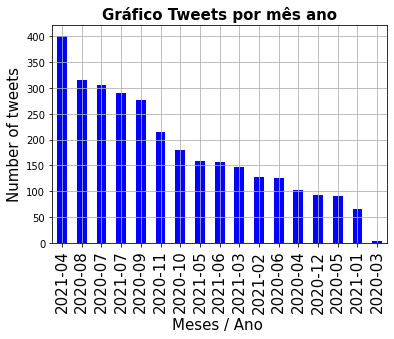

In [ ]:
import matplotlib.pyplot as plt
#Grafico de tweets acumulados por mês / ano


mes_ano_acumulado= df['mes_ano'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Meses / Ano ', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Gráfico Tweets por mês ano', fontsize=15, fontweight='bold')
plt.style.use('fivethirtyeight')
#mes_ano_acumulado[:5].plot(ax=ax, kind='bar', color='blue')
mes_ano_acumulado.plot(ax=ax, kind='bar', color='blue')
#https://www.listendata.com/2019/06/matplotlib-tutorial-learn-plot-python.html
#https://pbpython.com/groupby-agg.html

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


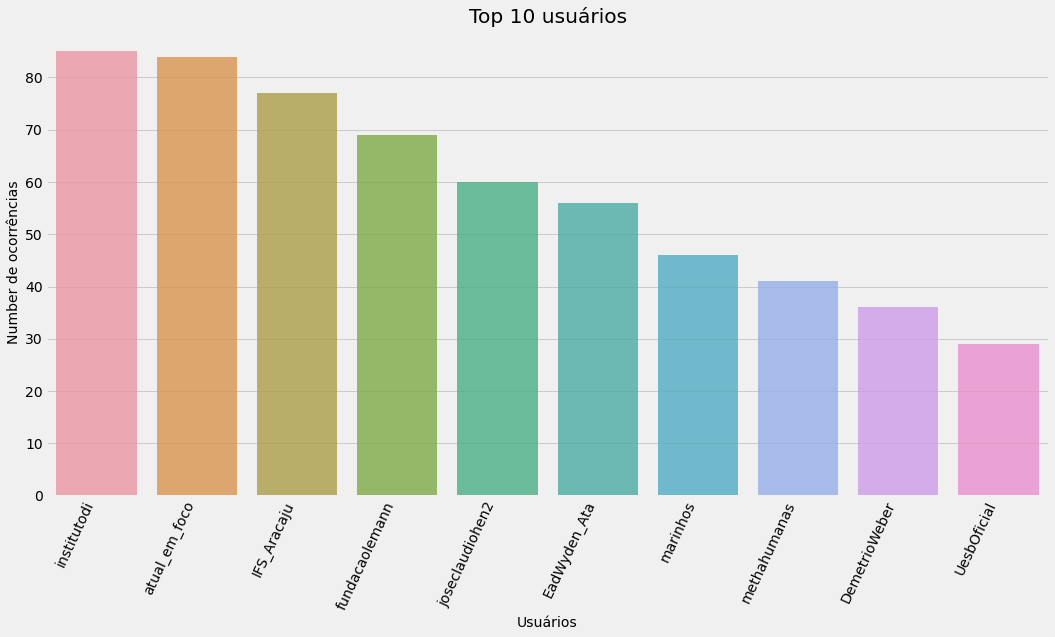

In [ ]:
# Top 10 users

#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

users_count  = df['author.username'].value_counts()
users_count = users_count[:10,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values, alpha=0.8)
plt.title('Top 10 usuários')
plt.ylabel('Number de ocorrências', fontsize=14)
plt.xlabel('Usuários', fontsize=14)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()



In [ ]:
df.columns

Index(['id', 'created_at', 'text', 'attachments.media',
       'attachments.media_keys', 'attachments.poll.duration_minutes',
       'attachments.poll.end_datetime', 'attachments.poll.id',
       'attachments.poll.options', 'attachments.poll.voting_status',
       'attachments.poll_ids', 'author.id', 'author.created_at',
       'author.username', 'author.name', 'author.description',
       'author.entities.description.cashtags',
       'author.entities.description.hashtags',
       'author.entities.description.mentions',
       'author.entities.description.urls', 'author.entities.url.urls',
       'author.location', 'author.pinned_tweet_id', 'author.profile_image_url',
       'author.protected', 'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.listed_count',
       'author.public_metrics.tweet_count', 'author.url', 'author.verified',
       'author.withheld.scope', 'author.withheld.copyright',
       'author.withheld

In [ ]:
# make a new column to highlight retweets
df['is_retweet'] = df['text'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

1088

In [ ]:
# 10 most repeated tweets
df.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

text  counts
1578  RT @ericbrasiln: Ensino remoto tá puxado pra t...     207
1785  RT @walmeszeviani: É com satisfação que divulg...      93
1778  RT @vidadeservidor_: Um desabafo que resume a ...      59
1758  RT @ufrj: A UFRJ, por meio do seu Conselho de ...      36
1429  RT @AlencarBraga13: 📒 O professor de Geografia...      14
1760  RT @ufrj: UFRJ, Uerj, UFF, Unirio, UFRRJ, Uenf...      14
1753  RT @ubesoficial: O nome disso é desigualdade s...      14
1535  RT @agenciapublica: Mais de 5 milhões de aluno...      13
1511  RT @SinasefeIfes: Professores, técnicos e alun...      12
1551  RT @bterralivre: No #Antinomia de hj, conversa...      11

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 94 columns):
 #   Column                                           Non-Null Count  Dtype              
---  ------                                           --------------  -----              
 0   id                                               3060 non-null   int64              
 1   created_at                                       3054 non-null   datetime64[ns, UTC]
 2   text                                             3060 non-null   object             
 3   attachments.media                                995 non-null    object             
 4   attachments.media_keys                           995 non-null    object             
 5   attachments.poll.duration_minutes                4 non-null      float64            
 6   attachments.poll.end_datetime                    4 non-null      object             
 7   attachments.poll.id                              4 non-null      float64      

In [ ]:

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', df.text)

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', df.text)

# make new columns for mentioned usernames and hashtags
#df['mentioned'] = df.text.apply(find_mentioned)
df['hashtags'] = df.text.apply(find_hashtags)

TypeError: ignored

In [ ]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

NameError: ignored

In [ ]:
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', df.text)  

In [ ]:
df['hashtags'] = df.text.apply(find_hashtags)

SyntaxError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 93 columns):
 #   Column                                           Non-Null Count  Dtype              
---  ------                                           --------------  -----              
 0   id                                               3060 non-null   int64              
 1   created_at                                       3054 non-null   datetime64[ns, UTC]
 2   text                                             3054 non-null   object             
 3   attachments.media                                995 non-null    object             
 4   attachments.media_keys                           995 non-null    object             
 5   attachments.poll.duration_minutes                4 non-null      float64            
 6   attachments.poll.end_datetime                    4 non-null      object             
 7   attachments.poll.id                              4 non-null      float64      

In [ ]:
df['author.location']

0                                NaN
1                Porto Velho, Brasil
2                   Salvador, Brasil
3                                NaN
4             Rio de Janeiro, Brasil
                    ...             
3055                          Brazil
3056    Here, there and everywhere. 
3057    Here, there and everywhere. 
3058                             NaN
3059    Here, there and everywhere. 
Name: author.location, Length: 3060, dtype: object

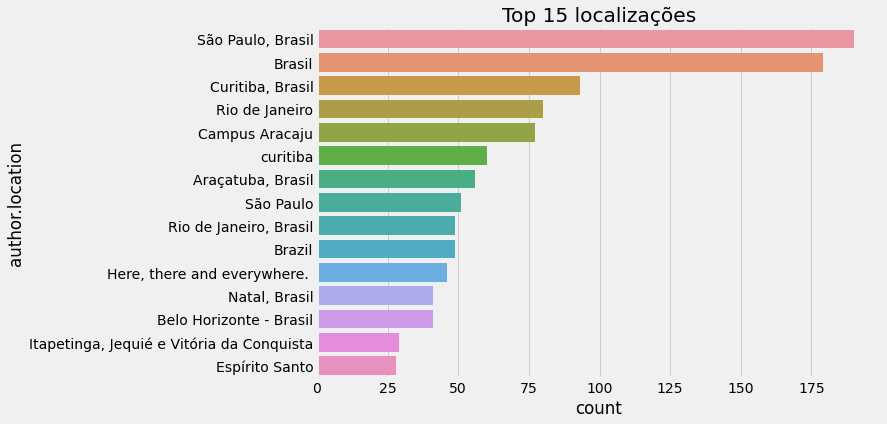

In [ ]:
# Most common locations
plt.figure(figsize=(9,6))
sns.countplot(y= 'author.location', data = df, order = df['author.location'].value_counts().iloc[:15].index);
plt.title('Top 15 localizações')
plt.show()

In [ ]:
#type(boulder_july_2018['date'][0])
type(df.created_at[0])


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
import re
def find_hashtags(text):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)   

df['hashtags'] = df.text.apply(find_hashtags).astype(str)

In [ ]:
#pd.set_option(“min_rows”, 100)
df.head(500)

id  ...                                           hashtags
0    1416145479939805191  ...  ['#trabalhoremoto', '#ensinoremoto', '#Educaca...
1    1415925194321969155  ...  ['#CDD', '#Zoom', '#GoogleMeet', '#EnsinoRemoto']
2    1415123734671810561  ...  ['#ensinoremoto', '#twitterstorians', '#digita...
3    1415873994637598722  ...                                                 []
4    1415059480149204996  ...                                  ['#EnsinoRemoto']
..                   ...  ...                                                ...
495  1396439250867036162  ...  ['#educa', '#ensinoremoto', '#coordena', '#men...
496  1396257257508294657  ...                  ['#Professores', '#EnsinoRemoto']
497  1396252885390868484  ...  ['#atualidadeemfoco', '#geografia', '#ensinore...
498  1396201577099239426  ...  ['#atualidadeemfoco', '#hist', '#ensinoremoto'...
499  1395472865395359747  ...  ['#IATBA', '#FerramentasDigitais', '#EnsinoRem...

[500 rows x 95 columns]

# 4.2 extraçao hashtags

In [ ]:
df['text'] = df['text'].apply(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               3060 non-null   int64  
 1   created_at                                       3054 non-null   object 
 2   text                                             3060 non-null   object 
 3   attachments.media                                995 non-null    object 
 4   attachments.media_keys                           995 non-null    object 
 5   attachments.poll.duration_minutes                4 non-null      float64
 6   attachments.poll.end_datetime                    4 non-null      object 
 7   attachments.poll.id                              4 non-null      float64
 8   attachments.poll.options                         4 non-null      object 
 9   attachments.poll.voting_status

In [ ]:
df.count()

coordinates                     51
created_at                    2891
hashtags                      2059
media                          926
urls                          1222
favorite_count                2891
id                            2891
in_reply_to_screen_name        165
in_reply_to_status_id          159
in_reply_to_user_id            165
lang                          2891
place                           83
possibly_sensitive            1667
retweet_count                 2891
retweet_id                    1099
retweet_screen_name           1099
source                        2891
text                          2891
tweet_url                     2891
user_created_at               2891
user_screen_name              2891
user_default_profile_image    2891
user_description              2663
user_favourites_count         2891
user_followers_count          2891
user_friends_count            2891
user_listed_count             2891
user_location                 2232
user_name           

In [ ]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
hashtags

NameError: ignored

In [ ]:
#extracting hashtags from non racist/sexist tweets
import re
df.text.astype(str)
HT_regular = hashtag_extract(df['text'].str.lower())

In [ ]:
HT_regular

[[],
 [],
 [],
 ['ensinoremoto'],
 ['ensinoremoto',
  'aulaonline',
  'word',
  'quarentena',
  'matematica',
  'professora',
  'educación'],
 [],
 ['educacao',
  'educationforall',
  'homeoffice',
  'ensinoremoto',
  'homeschooling',
  'aulaonline',
  'quarentena'],
 ['ensinoremoto', 'aulaonline', 'word', 'quarentena', 'matemat'],
 [],
 [],
 ['ensinoremoto'],
 ['ensinoremoto', 'remoteteaching', 'remotelearning'],
 [],
 [],
 [],
 [],
 [],
 ['educacao',
  'educationforall',
  'homeoffice',
  'ensinoremoto',
  'homeschooling',
  'aulaon'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['ensinoremoto'],
 ['ensinoremoto', 'escolanapandemia', 'quarentena'],
 [],
 [],
 [],
 [],
 [],
 ['ead', 'escolas', 'ensinoremoto', 'educação'],
 [],
 ['ensinoremoto', 'educação'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['educação',
  'voltaàsaulas',
  'aulaspresenciais',
  'escolaspúblicas',
  'ensinoremoto'],
 [],
 [],
 ['minhaufpi',
  'ufpi',
  'ceadufpi',
  'ensinodelinguas',
  'ensinoremoto',
  'ensinohibrido',
  'julia

In [ ]:
# unnesting list
HT_regular = sum(HT_regular,[])

In [ ]:
import re    # for regular expressions
import nltk  # for text manipulation
# plot top n hashtags for positive class
freq_distribution = nltk.FreqDist(HT_regular) # key value pair
freq_dataframe = HT_regular({'Hashtag': list(freq_distribution.keys()),'Count': list(freq_distribution.values())})
# selecting top 20 most frequent hashtags
data = freq_dataframe.nlargest(columns="Count", n = 20)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=df, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Frequency Distribution for Non Racist/Sexist tweets")
plt.show()

TypeError: ignored

In [ ]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))

plt.title('Top 10 #Hashtags')
plt.ylabel('Contagem #Hashtags', fontsize=12)

splot = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')


#splot= sns.barplot(x,y, data=popular_hashtags);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

#https://www.kaggle.com/binhminhs10/twitter-sentiment-analysis

NameError: ignored

In [ ]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[df.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]
hashtags_list_df

AttributeError: ignored

In [ ]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [ ]:
type(flattened_hashtags_df)

pandas.core.frame.DataFrame

In [ ]:
flattened_hashtags_df

hashtag
0            [
1            '
2            #
3            t
4            r
...        ...
169686       i
169687       n
169688       g
169689       '
169690       ]

[169691 rows x 1 columns]

In [ ]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame([hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list], columns=['hashtags'])

flattened_hashtags_df

hashtags
0             [
1             '
2             #
3             t
4             r
...         ...
169686        i
169687        n
169688        g
169689        '
169690        ]

[169691 rows x 1 columns]

In [ ]:
# number of unique hashtags
flattened_hashtags_df['hashtags'].unique().size

70

In [ ]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtags').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)


                              

In [ ]:
popular_hashtags.tail

<bound method NDFrame.tail of    hashtags  counts
0         '   21624
1         o   13743
2         e   12695
3         a   11308
4         #   10812
..      ...     ...
65        -       2
66        X       2
67        7       2
68        4       1
69        8       1

[70 rows x 2 columns]>

In [ ]:
type(popular_hashtags.head(10))

pandas.core.frame.DataFrame

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
x = popular_hashtags.hashtags.head(10)
y = x = popular_hashtags.counts.head(10)
plt.plot(x,y)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.catplot(x="popular_hashtags", kind="counts", palette="ch:.25", data=popular_hashtags)
#plt.plot(popular_hashtags['hashtags.head(10)'], popular_hashtags['counts'])
plt.plot(popular_hashtags['hashtags'], popular_hashtags['counts'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


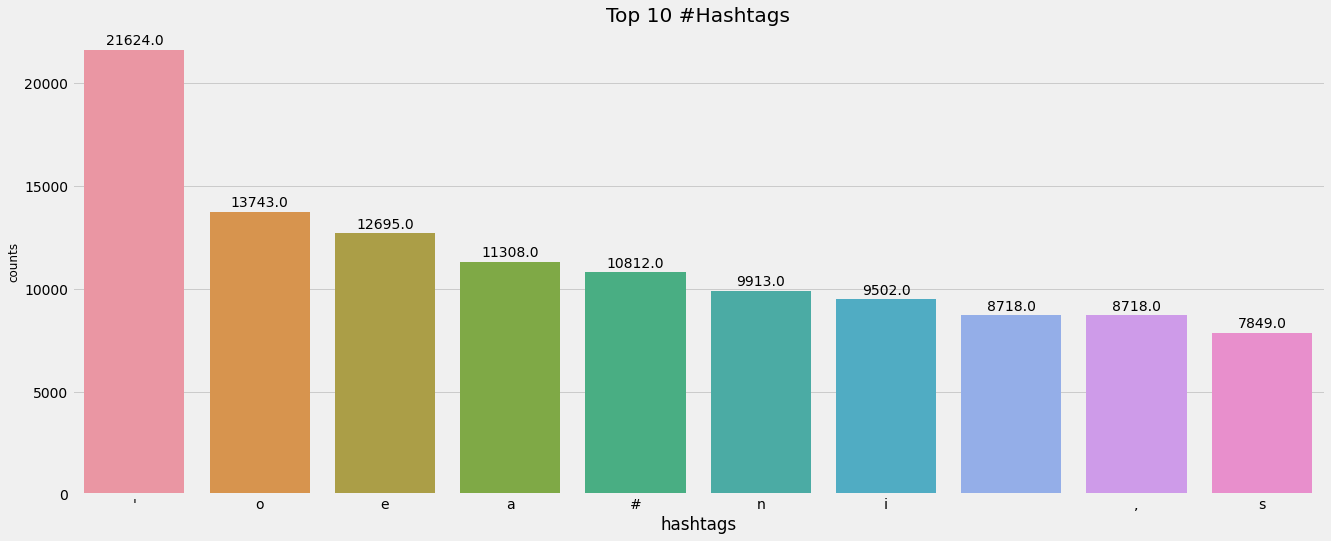

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
x = popular_hashtags.hashtags.head(10)
y = popular_hashtags.counts.head(10)
plt.title('Top 10 #Hashtags')
plt.ylabel('#Hashtags', fontsize=12)
splot= sns.barplot(x,y, data=popular_hashtags);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')



In [ ]:
popular_hashtags


hashtags  counts
0         '   21624
1         o   13743
2         e   12695
3         a   11308
4         #   10812
..      ...     ...
65        -       2
66        X       2
67        7       2
68        4       1
69        8       1

[70 rows x 2 columns]

# 4.9 Popular hashtags

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 51 non-null     object 
 1   created_at                  2891 non-null   object 
 2   hashtags                    2059 non-null   object 
 3   media                       926 non-null    object 
 4   urls                        1222 non-null   object 
 5   favorite_count              2891 non-null   int64  
 6   id                          2891 non-null   int64  
 7   in_reply_to_screen_name     165 non-null    object 
 8   in_reply_to_status_id       159 non-null    float64
 9   in_reply_to_user_id         165 non-null    float64
 10  lang                        2891 non-null   object 
 11  place                       83 non-null     object 
 12  possibly_sensitive          1667 non-null   object 
 13  retweet_count               2891 

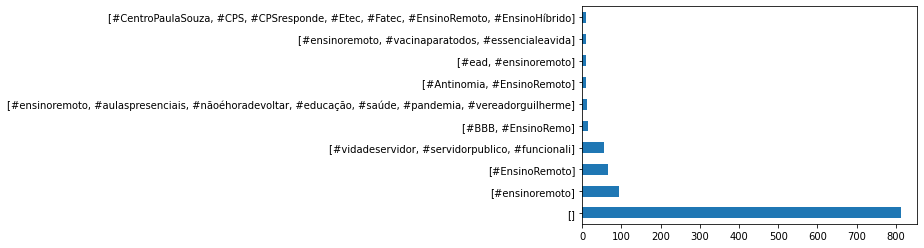

In [ ]:
df['hashtag'].value_counts()[:10].plot(kind='barh')


In [ ]:
plt.plot(popular_hashtags.head(10))

NameError: ignored

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot('hashtags', 'counts', data=popular_hashtags)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
# get the value counts for source column
#popular_hashtags[['hashtags','counts']]
popular_hashtags['hashtags'].value_counts()
#popular_hashtags.index

A    1
u    1
e    1
F    1
2    1
    ..
N    1
0    1
U    1
7    1
I    1
Name: hashtags, Length: 70, dtype: int64

In [ ]:
# Gráfico hashtags
popular_hashtags.sort_values(['hashtags', 'counts'], ascending=False).groupby('hashtags').head(10)
#cat_totals = popular_hashtags.groupby("hashtags")["counts"].sum().sort_values()
#cat_totals
plt.figure(figsize=(15,8))
cat_totals.plot(kind="barh", fontsize=4)
#https://realpython.com/pandas-plot-python/

NameError: ignored

<Figure size 1080x576 with 0 Axes>

In [ ]:
#popular_hashtags.sort_values(['hashtags', 'counts'], ascending=True).groupby('hashtags').head(10)
#popular_hashtags.sort_index(level=0).groupby('hashtags').head(10)
#popular_hashtags.groupby(['counts', 'hashtags']).size().head(10)
popular_hashtags.nlargest(10,['counts'])

hashtags  counts
0        '   21624
1        o   13743
2        e   12695
3        a   11308
4        #   10812
5        n    9913
6        i    9502
7             8718
8        ,    8718
9        s    7849

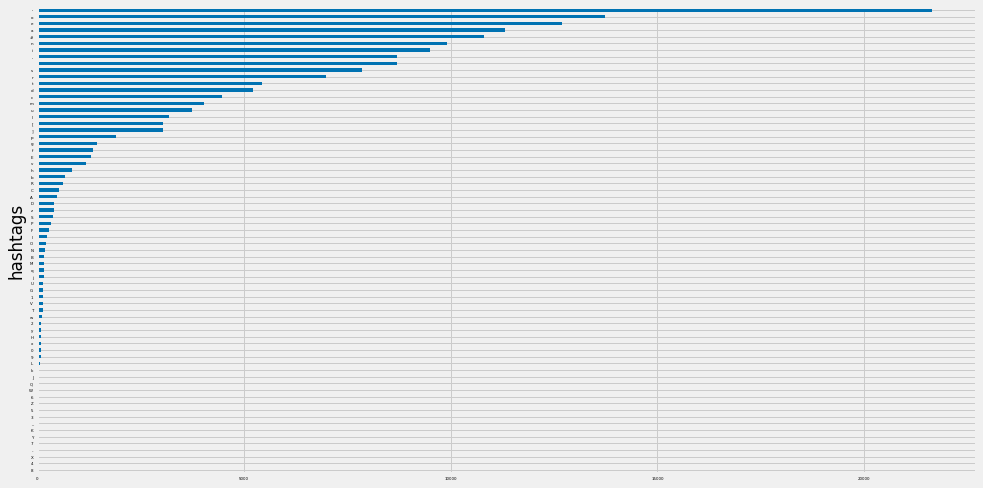

In [ ]:
# Gráfico hashtags
cat_totals = popular_hashtags.groupby("hashtags")["counts"].sum().sort_values()
cat_totals
plt.figure(figsize=(15,8))
cat_totals.plot(kind="barh", fontsize=4)
#https://realpython.com/pandas-plot-python/

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot the above data
# set the figure size
plt.figure(figsize=(15,8))

# create a countplot, ordered by count
sns.countplot(x='hashtags', data=popular_hashtags, palette = 'Blues_r' )
#sns.catplot(x="hashtags", kind="counts", palette="ch:.25", data=popular_hashtags)
# rotate the ticks for better readability
#plt.xticks(rotation=45, fontsize='11', horizontalalignment='right')

# set the labels and title
plt.xlabel('Sources (i.e. Twitter clients)')
plt.ylabel('Total tweets sent')
plt.title('Tweets sent by source');

In [ ]:
popular_hashtags

['counts', 'hashtags']

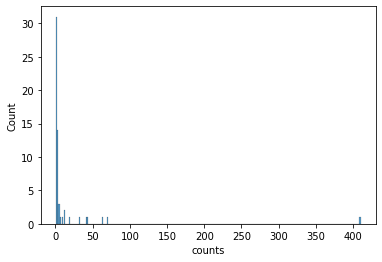

In [ ]:
import seaborn as sns
sns.histplot(popular_hashtags.counts) #, kde=True)
#sns.countplot(x='hashtags', data=popular_hashtags, palette = 'Blues_r' , order = df['hashtags'].value_counts().index)
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtags']).size()\
                              .reset_index(name='counts')\
                              .counts
# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5 

# plot histogram of tweet counts
#plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

# 4.10 Grafico Tags

In [ ]:
popular_hashtags.info

NameError: ignored

In [ ]:
df.popular_hashtags = pd.DataFrame(popular_hashtags)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
df.popular_hashtags.columns
#type(df.popular_hashtags)

Index(['hashtags', 'counts'], dtype='object')

In [ ]:
df.popular_hashtags

AttributeError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
plt.figure(figsize=(26,16))
df.popular_hashtags.sort_values(by='counts').plot.barh(x='hashtags', y='counts', ax=ax, color="purple")
ax.set_title("Top Hashtags")
plt.show()

#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/

AttributeError: ignored

In [ ]:
print(df.popular_hashtags['hashtags'], ['counts'])

AttributeError: ignored

In [ ]:
# teste 

#import matplotlib.pyplot as plt
import seaborn as sns
users_count  = df.popular_hashtags['hashtags'].value_counts()
users_count = users_count[:10,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values)
plt.title('Top 10 hashtasgs')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hashtasgs', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



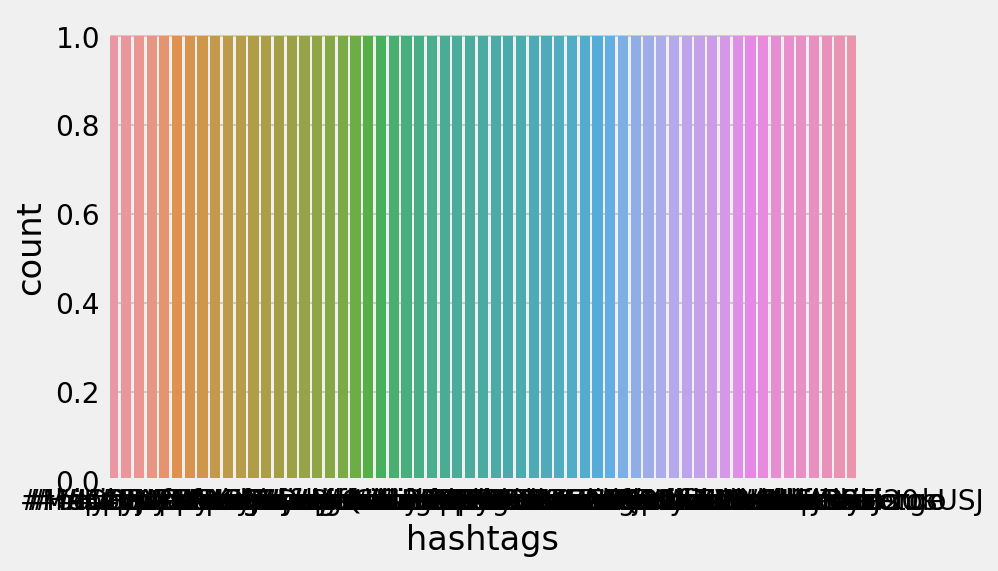

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot (x='hashtags', data=df.popular_hashtags)
plt.show()
#(df['df.popular_hashtags], bins = 10)

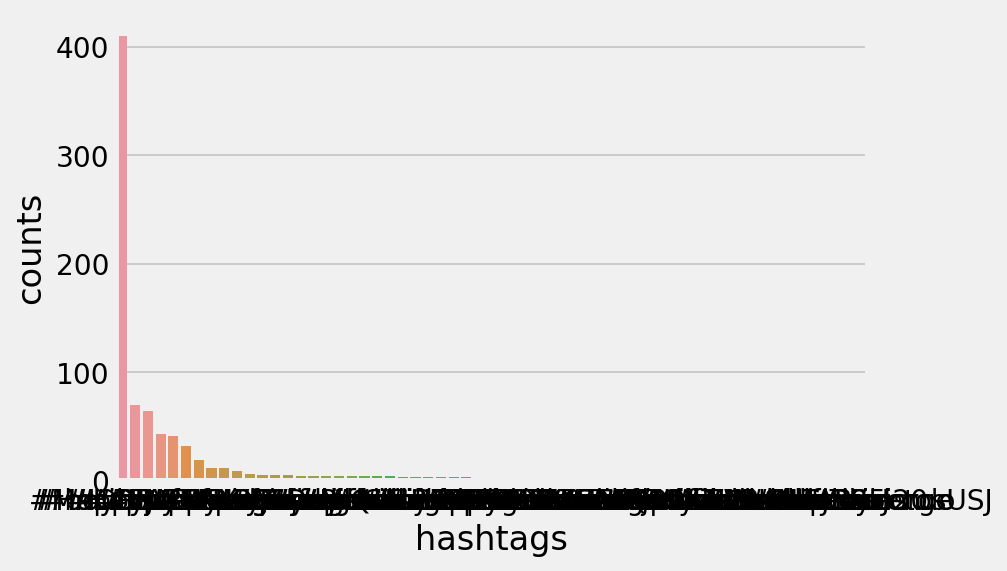

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

#sns.scatterplot(data=popular_hashtags, x="hashtags", y="counts")
ax = sns.barplot(x="hashtags", y="counts", data=popular_hashtags)

In [ ]:
word_list = [word for line in popular_hashtags for word in line.split()]
word_list[:5]

['counts', 'hashtags']

In [ ]:
word_list[:5]

['counts', 'hashtags']

In [ ]:
from collections import Counter
sns.set(style="darkgrid")
popular_hashtags = pd.DataFrame(hashtags)
popular_hashtags = ['counts', 'hashtags']
fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="frequency", x='word', ax = ax, data=popular_hashtags)


NameError: ignored

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
# Create a visualization


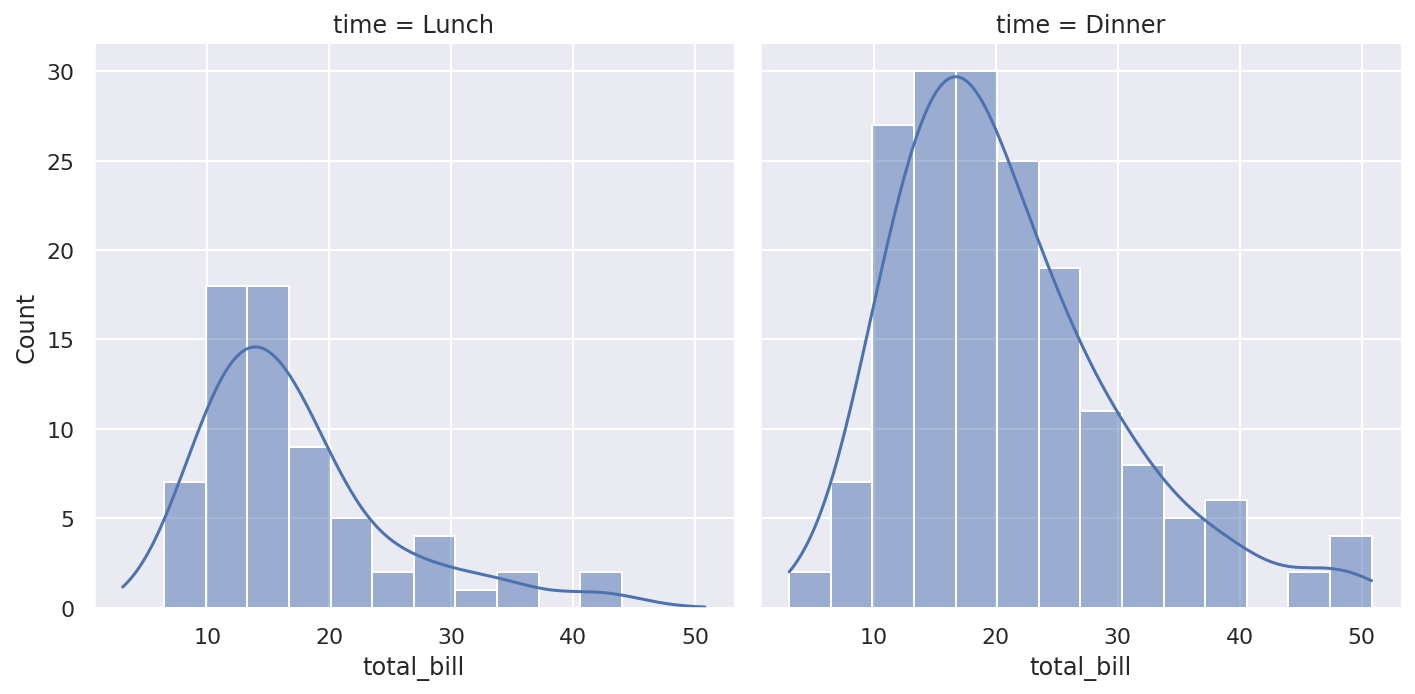

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

flights_data = sns.load_dataset("flights")
flights_data.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

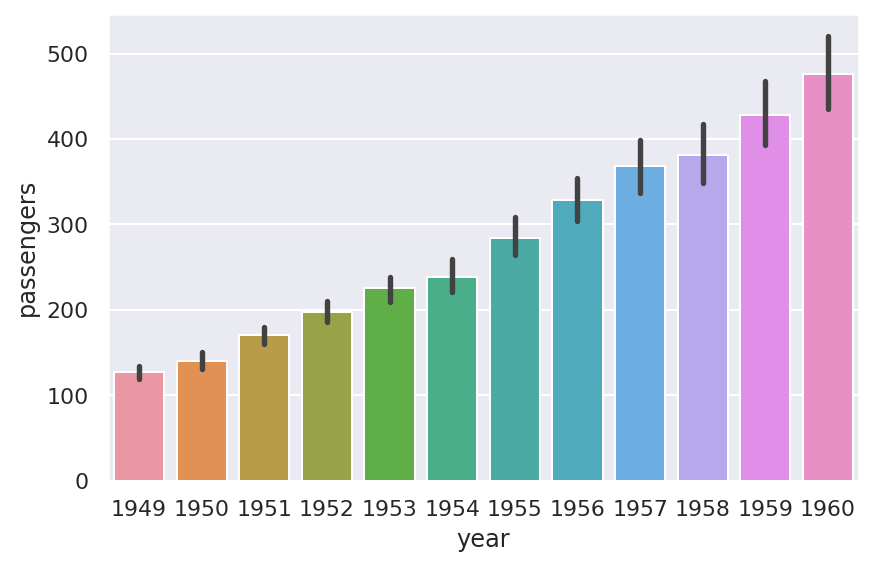

In [ ]:
sns.barplot(data = flights_data, x = "year", y = "passengers")

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = "hashtags", y = "counts", data = popular_hashtags)

AttributeError: ignored

In [ ]:
popular_hashtags

['counts', 'hashtags']

In [ ]:
from pandas import DataFrame
df3 = dataframe (popular_hashtags).transpose ()
df.columns ['hashtags', 'counts']

NameError: ignored

# Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
len(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


204

In [ ]:
stopwords[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

# Analise de sentimentos Textblob

In [ ]:
df.head()

coordinates  ... user_verified
0         NaN  ...         False
1         NaN  ...         False
2         NaN  ...         False
3         NaN  ...         False
4         NaN  ...         False

[5 rows x 34 columns]

In [ ]:
from textblob import TextBlob
import re
import numpy as np 

def clean_tweet(tweet):
    # remove special characters, links from tweets
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    # predict the sentiment of a tweet using textblob
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

# create a new column with the result of the sentiment analysis
df['sentiment'] = np.array([analize_sentiment(tweet) for tweet in df['text']])

# construct lists with classified tweets
pos_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] < 0]

# print percentages
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['text'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(df['text'])))

#verificar analise dos percentuais

#https://www.codementor.io/@ferrorodolfo/sentiment-analysis-on-trump-s-tweets-using-python-pltbvb4xr


Percentage of positive tweets: 5.949498443445175%
Percentage of neutral tweets: 92.5285368384642%
Percentage of negative tweets: 1.5219647180906262%


In [ ]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(df['text'])))

Percentage of positive tweets: 5.949498443445175%
Percentage of neutral tweets: 92.5285368384642%
Percentage de negative tweets: 1.5219647180906262%


In [ ]:
sentiments = ['Positivos', 'Negativos','Neutro']
percents = [len(pos_tweets), len(neg_tweets), len(neu_tweets)]

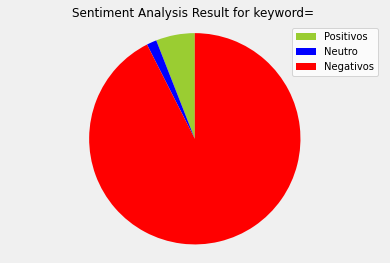

In [ ]:
import matplotlib.pyplot as plt

#creating piecharts
labels = ['Positivos', 'Neutro', 'Negativos' ]
sizes = [len(pos_tweets), len(neg_tweets), len(neu_tweets)]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
#pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(10, 6));
plt.style.use('default')
plt.legend(labels)
plt.title("Analise de Sentimentos - TextBlob " )
plt.axis('equal')
plt.show()

In [ ]:
https://github.com/vidsssw/Sentiment140/blob/main/Twitter_Sentiment_Analysis.ipynb

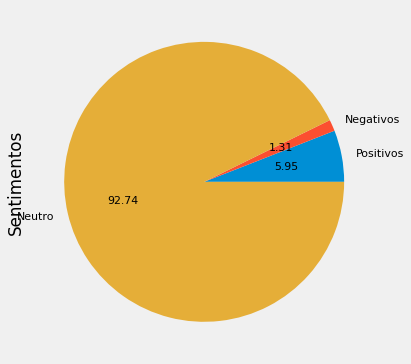

In [ ]:
pie_chart = pd.Series(percents, index=sentiments, name='Sentimentos')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(10, 6));

In [ ]:
#https://github.com/SimranKaur-23/TwitterSentimentAnalysis/blob/main/TwitterSentimentAnalysis.ipynb

In [ ]:

# Polarity count

_, ax = plt.subplots()
ax.set_title("Value Counts", fontsize=20)
ax.set_xlabel("Polarity Type", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.bar(data1['polarity_type'].unique(), height=data1['polarity_type'].value_counts())
#https://github.com/AnuragAnalog/Twitter-Data-Analysis/blob/master/Sentiment%20Analysis%20for%20Twitter%20Data.ipynb

# Twitter Setiments Analisys with NLTK
Training Model

In [ ]:

#Gets all hashtags.
def get_hashtags(df):
    return [tag['text'] for tag in dftweet['entities']['hashtags']]

#https://gist.github.com/timothyrenner/dd487b9fd8081530509c 


In [ ]:
df.head

In [ ]:
#tratamento campo TEXT 
import re
# Cleaning the text by removing hastags, @'s, URL's.
def CleanTxt(text):
  text = re.sub(r"@(\w+)", ' ', text) # This wil remove any @ mentions
  text = re.sub('@[^\s]+','',text) # This will remove any hashtags (#)
  text = re.sub('https?:\/\/\S+', '', text) # This will remove any URl's
  text = re.sub('RT[\s]+', '', text) # This will remove any RT mentions

  return text

# Cleaning the text
df['text_limpo'] = df['text'].apply(CleanTxt)

# Showing the cleaned text
df['text_limpo']

#df['text','text_limpo']




#https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
#https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082
#https://dev.to/nicfoxds/how-to-analyse-clean-text-data-in-python-2hb9
#https://twitter-data-analysis.blogspot.com/2020/08/twitter-data-analysis-part-3-sentiment.html

0       : Ensino remoto tá puxado pra todo mundo, né?\...
1       O  traz as ações dos estados durante a pandemi...
2       : Ensino remoto tá puxado pra todo mundo, né?\...
3       GUIA DE SERVIÇOS 📋\n\nFique ligado, estudante!...
4       \n\nAprendendo matemática de forma bem simples...
                              ...                        
2886    : Apresentando a Apple Education Learning Seri...
2887    É a verdade, incomode a quem incomodar.\nEs la...
2888    Para gravar as suas aulas ou pedir tarefas aos...
2889    Estamos juntos com a Fundação 1BI e com a   do...
2890    Tire. suas dúvidas sobre como configurar o App...
Name: text_limpo, Length: 2891, dtype: object

In [ ]:
#comparando dados campo TEXT e TEXT_LIMPO
df[['id','text','text_limpo']]

id  ...                                         text_limpo
0     1415494024824229890  ...  : Ensino remoto tá puxado pra todo mundo, né?\...
1     1417185003486732289  ...  O  traz as ações dos estados durante a pandemi...
2     1415405541275308034  ...  : Ensino remoto tá puxado pra todo mundo, né?\...
3     1417839642280345606  ...  GUIA DE SERVIÇOS 📋\n\nFique ligado, estudante!...
4     1418612057323225093  ...  \n\nAprendendo matemática de forma bem simples...
...                   ...  ...                                                ...
2886  1255503199093567489  ...  : Apresentando a Apple Education Learning Seri...
2887  1241331230106431496  ...  É a verdade, incomode a quem incomodar.\nEs la...
2888  1255618786583097345  ...  Para gravar as suas aulas ou pedir tarefas aos...
2889  1247621847778299905  ...  Estamos juntos com a Fundação 1BI e com a   do...
2890  1255623483935121414  ...  Tire. suas dúvidas sobre como configurar o App...

[2891 rows x 3 columns]

In [ ]:
# Print the columns of the dataframe
print(df.columns)

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'text_limpo'],
      dtype='object')


In [ ]:
#Filtrando dados TEA
df.user_name

0                                                 madeira
1                                                  Consed
2                                             Liz Salomão
3                                                    Uesb
4                                          🌸 Tia Quelli 🌸
                              ...                        
2886                                   Antonio Nascimento
2887    Marinhos vacinado (2 doses) e mascarado (N95/P...
2888                                     Solange Giardino
2889                                      Fundação Lemann
2890                                     Solange Giardino
Name: user_name, Length: 2891, dtype: object

In [ ]:
# Get all names 
for col_name in df.columns: 
    print(col_name)

coordinates
created_at
hashtags
media
urls
favorite_count
id
in_reply_to_screen_name
in_reply_to_status_id
in_reply_to_user_id
lang
place
possibly_sensitive
retweet_count
retweet_id
retweet_screen_name
source
text
tweet_url
user_created_at
user_screen_name
user_default_profile_image
user_description
user_favourites_count
user_followers_count
user_friends_count
user_listed_count
user_location
user_name
user_screen_name.1
user_statuses_count
user_time_zone
user_urls
user_verified
mes_ano
first_five_Letter
sentiment


In [ ]:
df.values.tolist()

[[nan,
  'Thu Jul 15 02:10:48 +0000 2021',
  nan,
  nan,
  nan,
  0,
  1415494024824229890,
  nan,
  nan,
  nan,
  'pt',
  nan,
  nan,
  251,
  1.4151237346718106e+18,
  'ericbrasiln',
  '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'RT @ericbrasiln: Ensino remoto tá puxado pra todo mundo, né?\nTenho tentado otimizar o fluxo de trabalho com alguns aplicativos de código ab…',
  'https://twitter.com/rogeriomadeira2/status/1415494024824229890',
  'Thu Jul 05 13:34:24 +0000 2012',
  'rogeriomadeira2',
  False,
  'Doutor em direito pela @UnB_oficial. Pesquisador do grupo de pesquisas Percursos, Narrativas, Fragmentos da FD- UnB. Estuda o pensamento autoritário brasileiro.',
  1629,
  135,
  1116,
  1,
  'Brasília',
  'madeira',
  'rogeriomadeira2',
  1088,
  nan,
  'https://unb.academia.edu/FranciscoRog%C3%A9rioMadeiraPinto',
  False,
  ': Ensino remoto tá puxado pra todo mundo, né?\nTenho tentado otimizar o fluxo de trabalho com alguns aplicativo

In [ ]:

#Lets take a look at the users who are posting these tweets:
print("There are {} different users".format(df['user_name'].nunique()))

#https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920

There are 1536 different users


In [ ]:


#Plot these results
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (15,15))
index = np.arange(25)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1)
plt.xlabel('Most active Users', fontsize = 18)
plt.ylabel('Nº of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=90)
plt.title('Number of tweets for the most active users', fontsize = 20)
plt.savefig('Tweets_of_active_users.jpg')
plt.show()
#com erro 
#https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920

NameError: ignored

<Figure size 1080x1080 with 0 Axes>

In [ ]:
df1 = pd.DataFrame(df)
df['created_at'] = pd.to_datetime(df['created_at']) # convert to datetime data type
df.sort_values(by='created_at');
df1.created_at



0      2021-01-10 04:22:28+00:00
1      2021-01-10 04:32:29+00:00
2      2021-01-10 05:50:56+00:00
3      2021-01-10 08:27:24+00:00
4      2021-01-10 08:37:02+00:00
                  ...           
4993   2020-10-12 04:17:43+00:00
4994   2020-10-10 23:38:26+00:00
4995   2020-10-10 15:45:57+00:00
4996   2020-10-13 16:23:33+00:00
4997   2020-10-13 00:30:49+00:00
Name: created_at, Length: 4998, dtype: datetime64[ns, UTC]

# Sentimentos Plutchik

In [ ]:
#Install Pyplutchik
!pip3 install pyplutchik

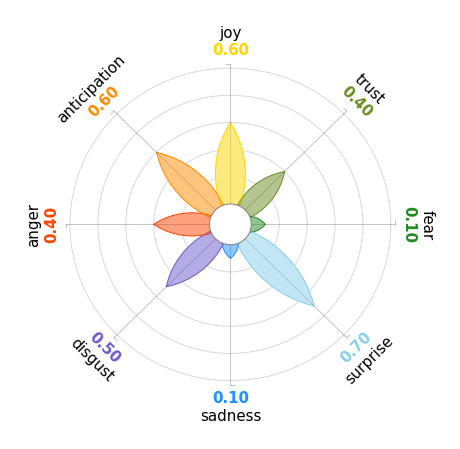

In [ ]:
from pyplutchik import plutchik

emotions = {'joy': 0.6,
            'trust': 0.4,
            'fear': 0.1,
            'surprise': 0.7,
            'sadness': 0.1,
            'disgust': 0.5,
            'anger': 0.4,
            'anticipation': 0.6}
            
plutchik(emotions)

In [ ]:
import nltk
nltk.download('punkt')

love = ['sayang','cinta','rindu','bahagia']
joy = ['gembira','suka','senang','suka cita','riang']
surprise = ['terkejut','mengherankan','mencengangkan','mengagetkan','menterkejuntukan','keheranan','heran']
anger = ['marah','kemarahan','berang','murka','dongkol']
sadness =['sedih','pilu','sayu','rintih']
fear = ['takut','khawatir','cemas','bimbang']

example_text = 'Beberapa rindu memang harus sembunyi-sembunyi. Bukan untuk disampaikan, hanya untuk dikirimkan lewat doa.'
tokens = nltk.word_tokenize(example_text)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['Beberapa', 'rindu', 'memang', 'harus', 'sembunyi-sembunyi', '.', 'Bukan', 'untuk', 'disampaikan', ',', 'hanya', 'untuk', 'dikirimkan', 'lewat', 'doa', '.']


In [ ]:
from pyplutchik import plutchik
from matplotlib . pyplot import plt
from random import uniform
fig , ax = plt . subplots ( nrow = 5 ,
ncol = 5 ,
figsize = ( 8*5 , 8*5) )
emotions = ['anger',
'anticipation ',
'joy',
'trust ',
'fear ',
'surprise ',
'sadness ',
'disgust ']
i = 0
for row in range (5):
  for col in range ( 5 ):
# get axes (i+1)
  plt . subplot (5 , 5 , i + 1 )
# generate random data
emo = {key: uniform (0 , 1 )
for key in emotions }
# draw
plutchik ( emo , ax = plt . gca () )
# update i
i += 1


IndentationError: ignored

# Top 5 linguagens tuites

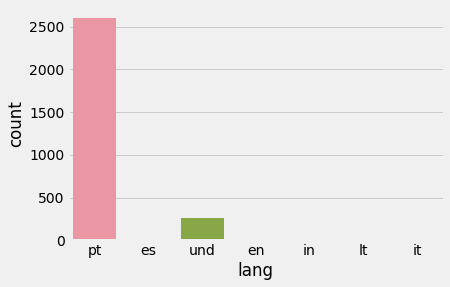

In [ ]:

# importing the required library
 
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library
#df = sns.load_dataset('tips')
 
# count plot on single categorical variable
sns.countplot(x ='lang', data = df)
 
# Show the plot
plt.show()

In [ ]:
# in the column 'City'
city_count  = df['lang'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(8,6))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Top 5 linguagens')
plt.ylabel('Numero de ocorrencias', fontsize=12)
plt.xlabel('Linguagem', fontsize=12)
plt.show()
#https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
df.lang.value_counts().sort_values().plot(kind = 'barh')

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
tweets_by_lang = df['lang'].value_counts()
tweets_by_lang.dtype
tweets_by_lang
sns.barplot(x=df.lang.value_counts().index, y=df.lang.value_counts())
#df.dtypes

In [ ]:
import seaborn as sns
sns.barplot(
    x='lang', y='tweets_by_lang',
    hue="Explícita",
    data=df)
plt.gcf().set_size_inches(10, 2.5)

ValueError: ignored

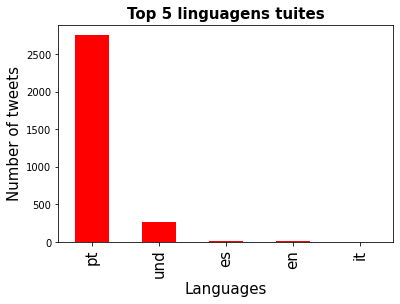

In [ ]:
import matplotlib.pyplot as plt

#top languages

tweets_by_lang = df['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 linguagens tuites', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')



In [ ]:
df.head() 

In [ ]:
def extract_link(tex):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

df.text

0                             @Tea_earte てぃさんおはようございますっ😆✨
1                              @Tea_earte てぃさぁぁあんんんん！！！！！
2       GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3               @Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4       @Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
                              ...                        
4993         Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994        earte me fazendo passar raiva em pleno sábado
4995    @Lugusfe SIM! as atividades do earte que aguar...
4996       em completo desespero e desânimo com com earte
4997    eu simplesmente estou ignorando tudo relaciona...
Name: text, Length: 4998, dtype: object

In [ ]:
#informações do dataframe
#df.info() 

# Número de linhas da coluna ‘Text’:
df.Text.count()

# Removendo os valores duplicados:
df.drop_duplicates(['Text'], inplace=True)

#https://minerandodados.com.br/analise-de-sentimentos-utilizando-dados-do-twitter/

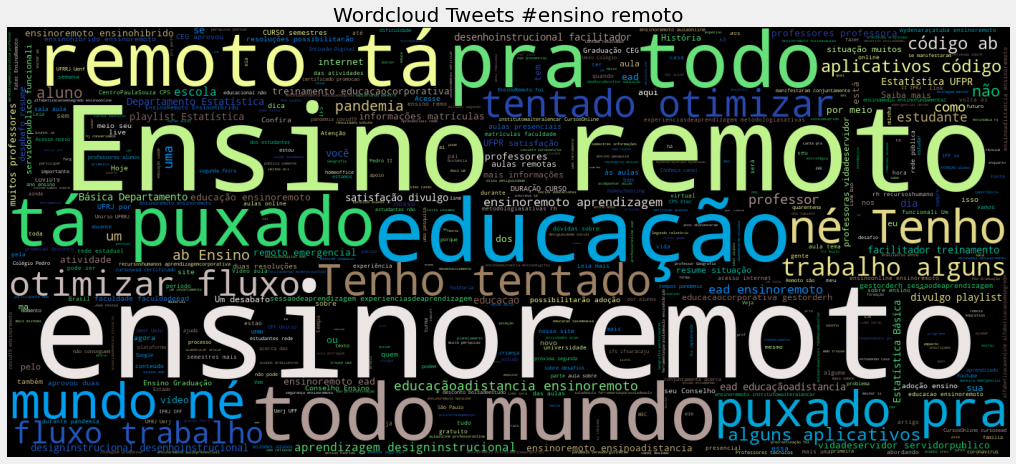

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
import json

import numpy as np 
import pandas as pd 
from time import time
import re
import string
import os
#import emoji
import collections

st_words = set(STOPWORDS)
#enhancing stopword by removing @mentions and shorthands
st_words.update(['que','de','da', 'para', 'https','CO','RT','na','ao','os', 'em','via','amp','place','new','ttot','best','great','top','ht','ysecrettravel','ysecrettravel_'])


wc = WordCloud(height=600,
               repeat=False,
               width=1400,
               max_words=500,
               stopwords=st_words,
               colormap='terrain',
               background_color='Black',
               mode='RGBA').generate(' '.join(df['text_limpo'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Wordcloud Tweets #ensino remoto')
plt.axis('off')
plt.show()

#https://www.kaggle.com/overload10/twitter-dataset-eda referencia

# Analise de dados


In [ ]:
for index,text in enumerate(df['text']):
  print('Tweet %d:\n'%(index+1),text)

In [ ]:
#teste sentimento 
#from textblob import TextBlob

#iterar imprimindo todos tweets
for i in df.text:
    print(df.text)


  
import pandas as pd 
from textblob import TextBlob
#df=pd.read_csv(r'/content/sample_data/tweet_activity_metrics_TheCoolFanBoi_20181208_20190105_en.csv')


#comment_words=' '
#stopwords=set(STOPWORDS)
print('Tweet   |     Polarity     |     Subjectivity')
for val in df.text:
    sentiments=TextBlob(val)
    print('---------------')
    print(val,end='')
    print(' ',end='')
    print(sentiments.polarity,end='')
    print(' |  ',end='')
    print(sentiments.subjectivity)

#Codigo com erro; Corrigir

A saída de streaming foi truncada nas últimas 5000 linhas.
---------------
Bora falar um pouco de Política antes de votar?
Acessa lá:
https://t.co/VxtFvAlHct

#EducacaoPolitica #EducacaoMidiatica #Eleicoes #EleicoesMunicipais #Eleicoes2020 #Politica #Democracia #cidade #Prefeitura #Educacao #GlobalMILWeek2020 #ead #aprender #EnsinoRemoto https://t.co/EiSVigN0Du 0.0 |  0.0
---------------
Matrículas abertas! Inscreva-se no nosso processo seletivo através do 🔗link da bio😊⁣
⁣
#SouRobertoCarneiro #InovacaoNoEnsinoCuidadoDeSempre #colegio #escolaparticular #ensinoremoto #amorqueconecta #ensinomedio #ensinofundamental #maternal #educacaoinfantil  #sistemabernoulli https://t.co/jsVVpwB1mm 0.0 |  0.0
---------------
A mídia informa que pesquisa com professores que lecionam em 26 estados e no DF mostrou que 82,4% deles se sentem extremamente ou muito confiantes com relação ao seu preparo técnico para o ensino online.
O problema é que não mostram a pesquisa.
Por que será? 

#EaD #EnsinoRemoto ht

In [ ]:
df.head()

coordinates  ...                                         text_limpo
0         NaN  ...  : Ensino remoto tá puxado pra todo mundo, né?\...
1         NaN  ...  O  traz as ações dos estados durante a pandemi...
2         NaN  ...  : Ensino remoto tá puxado pra todo mundo, né?\...
3         NaN  ...  GUIA DE SERVIÇOS 📋\n\nFique ligado, estudante!...
4         NaN  ...  \n\nAprendendo matemática de forma bem simples...

[5 rows x 35 columns]

In [ ]:
#lista de 20 top - PALAVRAS

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words=['earte','de','que','do', 'co','https','eu','no', 'pra','com', 'não', 'da', 'me',
                                 'rt', 'para','em','os', 'na','as', 'mais','um'])
count_matrix = cv.fit_transform(df.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["TOP_WORD"])
word_count["count"] = count_matrix.sum(axis = 0).tolist()[0]
word_count = word_count.sort_values("count", ascending = False).reset_index(drop = True)

word_count[:10]
#FUNCIONA 
#REFERENCIA: https://github.com/vhnegrisoli/analise-exploratoria-dados-python/blob/master/01%20-%20MongoDB%20e%20NoSQL%20com%20Python%2C%20Pandas%2C%20Scikit%20Learn%20e%20API%20Twitter.ipynb




TOP_WORD  count
0  ensinoremoto   1934
1        ensino    926
2        remoto    617
3      educação    476
4           ead    447
5      pandemia    290
6         sobre    289
7        alunos    271
8      trabalho    262
9         aulas    256

In [ ]:

# calculate number of characters in a tweet and save as new column
df['tweet_length']  = np.array([len(tweet) for tweet in df['text']])

print('Average number of characters per tweet:', df['tweet_length'].mean())
print('Average number of characters per reply:', df['tweet_length'][df['in_reply_to_status_id'] != 0].mean())
print('Average number of characters per retweet:', df['tweet_length'][df['retweeted_status_id'] != 0].mean())
print('Average number of characters per mention:', df['tweet_length'][df['mention_to_user_id'] != 0].mean())

#corrigir erro  retweet e mention
#https://www.kaggle.com/leonardoassis/portuguese-tweets-nltk-and-sklearn

Average number of characters per tweet: 184.68695952957455
Average number of characters per reply: 184.68695952957455


KeyError: ignored

text data analysis

In [ ]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    # remove special characters, links from tweets
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    # predict the sentiment of a tweet using textblob
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

# create a new column with the result of the sentiment analysis
df['sentiment'] = np.array([analize_sentiment(tweet) for tweet in df['text']])

# construct lists with classified tweets
pos_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] < 0]

# print percentages
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['text'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(df['text'])))

#verificar analise dos percentuais 

TypeError: ignored

time series analysis

In [ ]:
df.head()

In [ ]:
print('Total tweets in 2020:', df_time['2020']['created_at'].count())
#print('Total replies in 2020:', (df_time!=0)['2020']['in_reply_to_status_id'].sum()) # zeros need to be excluded

NameError: ignored

In [ ]:
from textblob import TextBlob

# perform sentiment analysis on each tweet
# -1 < polarity < 1 (negativity vs positivity (sentiment))
# 0 < subjectivity < 1 (factual vs opinion)
for text in df:
    print(df.text)
    analysis = TextBlob(df.text)
    print(analysis.sentiment)
    print("----------")

#    Deu erro. retomar https://ugoproto.github.io/ugo_py_doc/


0       A Comissão de Acompanhamento ao Trabalho/Ensin...
1       Zoom e outras reuniões pela Internet l"Se você...
2       Ensino remoto tá puxado pra todo mundo, né?\nT...
3       RT @ericbrasiln: Ensino remoto tá puxado pra t...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisação, não inovação educ...
3057    A ironia provocada pelo novo coronavírus.\nNa ...
3058    En una semana todos los docentes trabajando te...
3059    É a verdade, incomode a quem incomodar.\nEs la...
Name: text, Length: 3060, dtype: object


TypeError: ignored

In [ ]:
# Frequecy word
#Create List of Lower Case Words from Tweets

from collections import Counter

for item in df['text']:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()




A saída de streaming foi truncada nas últimas 5000 linhas.
[(' ', 14), ('o', 13), ('a', 10), ('e', 10), ('i', 7), ('c', 7), ('n', 7), ('t', 6), ('s', 6), ('p', 5)]

[(' ', 21), ('o', 20), ('a', 18), ('e', 16), ('s', 14), ('i', 13), ('t', 12), ('n', 11), ('d', 8), ('/', 8)]

[(' ', 22), ('e', 13), ('a', 12), ('s', 9), ('o', 9), ('n', 8), ('i', 8), ('d', 6), ('r', 6), ('l', 5)]

[('a', 23), (' ', 19), ('e', 18), ('o', 13), ('n', 10), ('t', 10), ('i', 10), ('m', 9), ('c', 7), ('s', 7)]

[('a', 36), (' ', 25), ('e', 25), ('o', 22), ('r', 21), ('d', 18), ('s', 18), ('i', 16), ('n', 13), ('t', 11)]

[(' ', 14), ('e', 13), ('a', 13), ('s', 12), ('o', 11), ('i', 8), ('u', 7), ('l', 7), ('m', 7), ('n', 7)]

[(' ', 14), ('e', 11), ('a', 11), ('n', 8), ('r', 7), ('s', 5), ('t', 5), ('o', 5), ('u', 4), ('m', 4)]

[(' ', 21), ('a', 16), ('e', 14), ('o', 10), ('s', 9), ('i', 8), ('d', 8), ('n', 7), ('c', 6), ('t', 6)]

[(' ', 22), ('a', 14), ('e', 13), ('o', 12), ('n', 9), ('i', 7), ('c', 6), ('t', 

In [ ]:
from collections import Counter
results = Counter()
df['text'].str.lower().str.split().apply(results.update)
print(results)

KeyError: ignored

In [ ]:
from collections import Counter

top=Counter([item for sublist in df['text'] for item in sublist])
df=pd.DataFrame(top.most_common(20))
df=df.iloc[1:,:]
df.columns=['Common_words','count']
df.style.background_gradient(cmap='OrRd')

In [ ]:
# most common words in twitter dataset

# Machine Learning imports
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
#from nltk.stem.wordnet import WordNetLemmatizerLoad #training dataset to Pandas and preview the top rows.
import matplotlib.pyplot as plt

all_words = []
for line in list(df['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

# Está funcionando. Falta inserir as stopWord
# https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


KeyError: ignored

In [ ]:
from collections import Counter

for item in df['text']:
    c = Counter(item)
    print (c.most_common()[:10]) # top 10, "\n")

[(' ', 35), ('o', 30), ('a', 29), ('e', 25), ('n', 16), ('s', 15), ('m', 12), ('i', 12), ('t', 12), ('r', 12)]
[(' ', 38), ('e', 25), ('o', 24), ('t', 14), ('i', 14), ('s', 13), ('a', 12), ('n', 12), ('c', 10), ('u', 9)]
[(' ', 34), ('o', 25), ('e', 22), ('n', 20), ('t', 20), ('i', 19), ('a', 18), ('s', 14), ('d', 12), ('r', 10)]
[(' ', 21), ('o', 16), ('a', 11), ('n', 9), ('i', 8), ('t', 8), ('d', 7), ('e', 6), ('r', 6), ('l', 5)]
[(' ', 35), ('o', 25), ('s', 24), ('a', 22), ('e', 22), ('n', 16), ('t', 15), ('i', 14), ('r', 12), ('c', 8)]
[(' ', 22), ('o', 15), ('e', 14), ('s', 13), ('a', 11), ('n', 9), ('t', 8), ('r', 7), ('d', 7), ('i', 6)]
[(' ', 22), ('o', 15), ('e', 14), ('s', 13), ('a', 11), ('n', 9), ('t', 8), ('r', 7), ('d', 7), ('i', 6)]
[(' ', 21), ('o', 16), ('a', 11), ('n', 9), ('i', 8), ('t', 8), ('d', 7), ('e', 6), ('r', 6), ('l', 5)]
[('n', 18), ('o', 15), ('a', 14), (' ', 11), ('e', 11), ('c', 10), ('t', 10), ('i', 9), ('u', 8), ('l', 7)]
[('o', 13), ('a', 12), ('n', 1

TypeError: ignored

In [ ]:
# 10 most repeated tweets
df.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)
#https://ourcodingclub.github.io/tutorials/topic-modelling-python/

KeyError: ignored

# Tuites e Retuites

In [ ]:
# Get the data
import matplotlib.pyplot as plt

tweet_count = len(df)
favorite_count = df['favorite_count'].sum()
retweet_count = df['retweet_count'].sum()

# Print it out
print('Number of tweets: ' + str(tweet_count))
print('Total number of likes: ' + str(favorite_count))
print('Total number of retweets: '+ str(retweet_count))
# Draw a nice plot of the likes and retweets
df.plot.bar(subplots=True, figsize=(10,6),y=
   ['favorite_count','retweet_count'])
plt.show()

KeyError: ignored

In [ ]:
import re
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import json
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

import os
import nltk

import warnings
warnings.filterwarnings("ignore")

df['words'] = df['text'].apply(lambda x:str(x.lower()).split())
top = Counter([item for sublist in df['words'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

KeyError: ignored

In [ ]:
from collections import Counter

top=Counter([item for sublist in df['text'] for item in sublist])
df=pd.DataFrame(top.most_common(20))
df=df.iloc[1:,:]
df.columns=['Common_words','count']
df.style.background_gradient(cmap='OrRd')

In [ ]:
# Stopwords em português:

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords[:10]
[u'de', u'a', u'o', u'que', u'e', u'do', u'da', u'em', u'um', u'para']

len(stopwords)
203

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


203

In [ ]:
# Inspecting the distribution of numerical values
df.describe()

id  ...  Unnamed: 91
count  3.060000e+03  ...          0.0
mean   1.337991e+18  ...          NaN
std    5.006019e+16  ...          NaN
min    1.241323e+18  ...          NaN
25%    1.293934e+18  ...          NaN
50%    1.329549e+18  ...          NaN
75%    1.383872e+18  ...          NaN
max    1.416145e+18  ...          NaN

[8 rows x 32 columns]

In [ ]:
# Generating Word Frequency
#Let's first generate a frequency table of all the words present in all the tweets combined.

def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(text.str)
#https://github.com/shivamsingh96/Natural_Language_Processing/blob/master/Exploring%20Text%20Data.ipynb


NameError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Instanciando o objeto
vectorizer = TfidfVectorizer()
#construindo o vetorizador dos dados
vectorizer.fit(df['text']) 

print(vectorizer.vocabulary_)

print(vectorizer.idf_)



ValueError: ignored

# #Top 15 words do dataset

In [ ]:
import numpy as np


In [ ]:
import nltk 
nltk.download('stopwords')
nltk_stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
str(stopwords.words('portuguese')[:50])

"['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem']"

In [ ]:
stop_words= ['em','sao','ao','de','da','do','para','c','kg','un',
              'ml','pct','und','das','no','ou','pc','gr','pt','cm',
              'vd','com','sem','gfa','jg','la','1','2','3','4','5',
              '6','7','8','9','0','a','b','c','d','e','lt','f','g',
              'h','i','j','k','l','m','n','o','p','q','r','s','t',
              'u','v','x','w','y','z']

In [ ]:
frase = 'Texto exemplo tokenização'
nltk.word_tokenize(frase)
 
['Texto', 'exemplo', 'tokenização']

['Texto', 'exemplo', 'tokenização']

In [ ]:
cvt = CountVectorizer(strip_accents='ascii', 
                      lowercase=True, 
                      stop_words=stop_words)

In [ ]:
X_cvt = cvt.fit_transform(df['text'])

In [ ]:
df.isna().sum()

id                           0
created_at                   6
text                         0
attachments.media         2065
attachments.media_keys    2065
                          ... 
withheld.country_codes    3060
__twarc.retrieved_at         0
__twarc.url                  0
__twarc.version              0
Unnamed: 91               3060
Length: 92, dtype: int64

In [ ]:
#converter data em formato Date
#https://www.marsja.se/pandas-convert-column-to-datetime/
df['created_at'] = pd.to_datetime(df['created_at'])

In [ ]:
df['created_at'].min()

Timestamp('2020-03-21 11:50:02+0000', tz='UTC')

In [ ]:

df['created_at'].max()

Timestamp('2021-07-27 17:48:24+0000', tz='UTC')

In [ ]:
import nltk
from nltk.corpus import stopwords
pt_br_stop_words = set(stopwords.words('portuguese'))
print('Portuguese Stopwords')
print(pt_br_stop_words)


Portuguese Stopwords
{'só', 'e', 'nem', 'houverão', 'hei', 'tive', 'estiverem', 'tiver', 'fosse', 'nas', 'teríamos', 'foram', 'são', 'houver', 'fora', 'delas', 'houvéramos', 'hajamos', 'estiveram', 'houveram', 'entre', 'da', 'tivessem', 'não', 'estes', 'seríamos', 'tém', 'tinham', 'ou', 'formos', 'somos', 'aos', 'me', 'estou', 'nosso', 'for', 'está', 'tivéramos', 'o', 'em', 'teremos', 'serei', 'ela', 'tiveram', 'estamos', 'fôramos', 'pelos', 'estivera', 'temos', 'uma', 'houveríamos', 'era', 'sejam', 'aquela', 'haja', 'tinha', 'estive', 'esteve', 'dela', 'na', 'pelas', 'seria', 'fôssemos', 'estavam', 'lhes', 'teria', 'se', 'nossas', 'tivemos', 'elas', 'depois', 'aqueles', 'tivéssemos', 'estivéramos', 'sem', 'mais', 'houverem', 'no', 'estávamos', 'às', 'tu', 'lhe', 'nós', 'aquilo', 'tenha', 'num', 'como', 'houveremos', 'essa', 'houveria', 'nossos', 'isto', 'fui', 'mesmo', 'tiverem', 'estivermos', 'também', 'é', 'estivéssemos', 'suas', 'tua', 'éramos', 'as', 'te', 'hão', 'houverá', 'teve'

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

df['text'] = df['text'].apply(str)

#df['text'] = df['text'].astype(str)

texto = df['text']
word_tokens = word_tokenize(df['text']
text_after_stopword = [w for w in word_tokens if not w in pt_br_stop_words]
print(text_after_stopword)

SyntaxError: ignored

In [ ]:
df['text_lowe'] = df['text'].str.lower()

In [ ]:
df[['text', 'text_lowe']]

text                                          text_lowe
0     A Comissão de Acompanhamento ao Trabalho/Ensin...  a comissão de acompanhamento ao trabalho/ensin...
1     Zoom e outras reuniões pela Internet l"Se você...  zoom e outras reuniões pela internet l"se você...
2     Ensino remoto tá puxado pra todo mundo, né?\nT...  ensino remoto tá puxado pra todo mundo, né?\nt...
3     RT @ericbrasiln: Ensino remoto tá puxado pra t...  rt @ericbrasiln: ensino remoto tá puxado pra t...
4     Diante dos desafios do nosso tempo, os educado...  diante dos desafios do nosso tempo, os educado...
...                                                 ...                                                ...
3055  RT @marinhos: Ensino remoto. Mas o que importa...  rt @marinhos: ensino remoto. mas o que importa...
3056  Ensino remoto. Improvisação, não inovação educ...  ensino remoto. improvisação, não inovação educ...
3057  A ironia provocada pelo novo coronavírus.\nNa ...  a ironia provocada pelo novo coronavírus.\nna ...
3058  En una semana todos los docentes trabajando te...  en una semana todos los docentes trabajando te...
3059  É a verdade, incomode a quem incomodar.\nEs la...  é a verdade, incomode a quem incomodar.\nes la...

[3060 rows x 2 columns]

In [ ]:
#https://datatofish.com/integers-to-strings-dataframe/

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

len(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


204

In [ ]:
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
# colocando as palavras em um objeto do tipo lista
words_list = list(dict(words_freq[:10]).keys())
# colocando as ocorrências em um objeto do tipo lista
occur_list = list(dict(words_freq[:10]).values())
# definindo a área de plotagem
plt.figure(figsize=(10,6))
# criando o gráfico
ax = sns.barplot(x = words_list, y = occur_list)
# inserindo o título
ax.set_title('TOP10 palavras que mais ocorreram')
# rotacionando os rótulos do eixo x
plt.xticks(rotation=30);

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

NameError: ignored

Text(0.5, 1.0, 'Palavras que mais aparecem - Top 15')

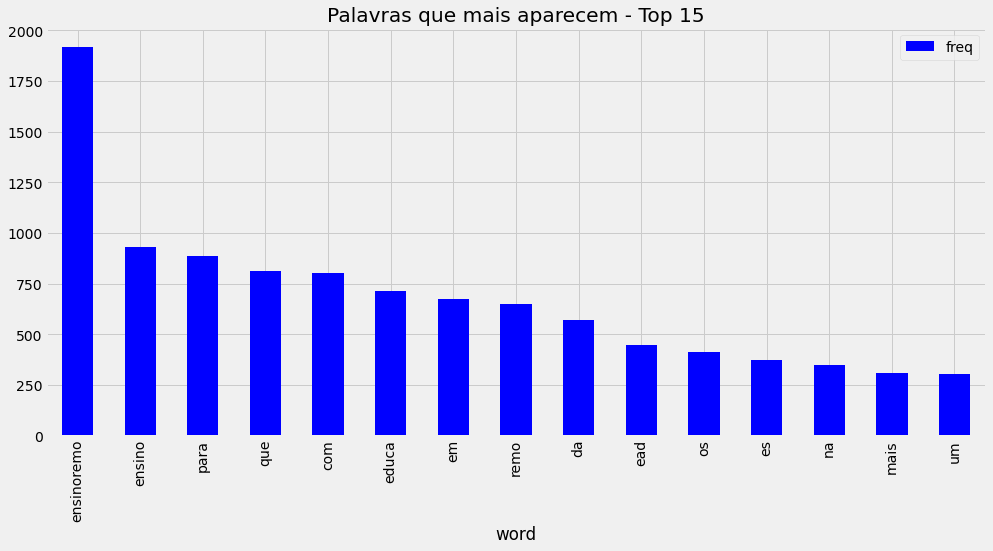

In [ ]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')

#stop_words = nltk.corpus.stopwords.words('portuguese') +\
#             nltk.corpus.stopwords.words('english')
#cv = CountVectorizer(stop_words = 'english')
stopwords = stopwords.words('portuguese')
words = cv.fit_transform(df.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(15).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Palavras que mais aparecem - Top 15")

In [ ]:
words_freq 

[('https', 2070),
 ('ensinoremoto', 1909),
 ('rt', 1096),
 ('ensino', 987),
 ('que', 922),
 ('para', 910),
 ('com', 844),
 ('em', 726),
 ('remoto', 659),
 ('da', 638),
 ('educação', 507),
 ('ead', 450),
 ('os', 441),
 ('na', 413),
 ('não', 385),
 ('nhttps', 358),
 ('um', 344),
 ('pandemia', 312),
 ('sobre', 311),
 ('mais', 308),
 ('alunos', 302),
 ('pra', 294),
 ('uma', 290),
 ('aulas', 279),
 ('trabalho', 265),
 ('professores', 258),
 ('se', 245),
 ('alguns', 245),
 ('como', 239),
 ('por', 233),
 ('tá', 227),
 ('todo', 226),
 ('mundo', 226),
 ('né', 221),
 ('aplicativos', 211),
 ('código', 211),
 ('otimizar', 209),
 ('ericbrasiln', 209),
 ('puxado', 208),
 ('ntenho', 208),
 ('tentado', 208),
 ('fluxo', 208),
 ('ab', 207),
 ('dos', 197),
 ('estatística', 189),
 ('aprendizagem', 188),
 ('estudantes', 187),
 ('professor', 177),
 ('educacao', 171),
 ('ufrj', 170),
 ('aula', 169),
 ('ao', 163),
 ('das', 154),
 ('às', 136),
 ('ensinoadistancia', 128),
 ('curso', 127),
 ('dia', 126),
 ('ensi

In [ ]:
data['title'].value_counts()[:20].plot(kind='barh')

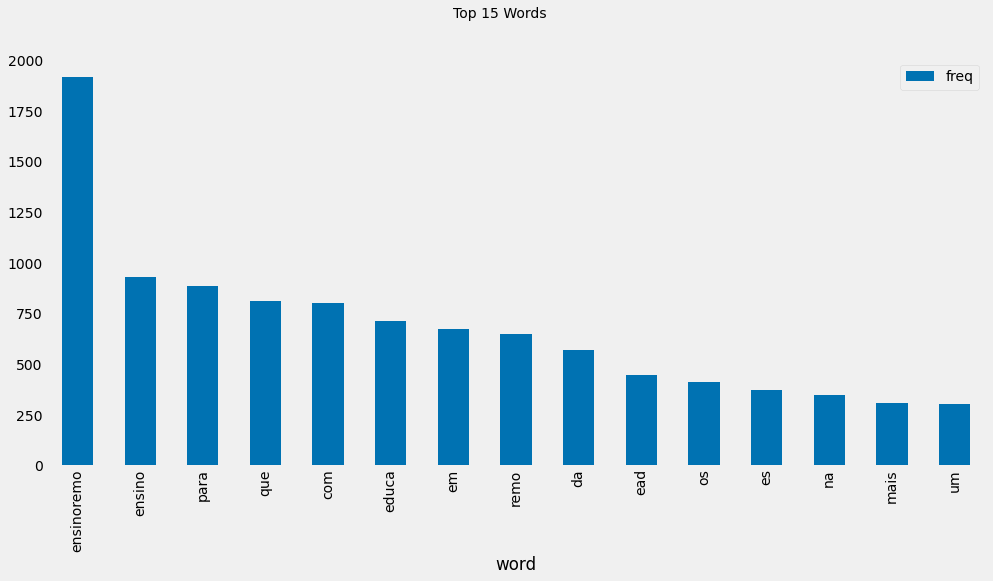

In [ ]:
#word_count = pd.DataFrame(cv.get_feature_names(), columns=["TOP_WORD"])
frequency.head(15).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
#fig, ax = plt.subplots(figsize=(12, 8))
#plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 15 Words', fontsize=14) 
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [ ]:
#lista de 20 top - PALAVRAS

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words=['rt','earte','de','que','do', 'co','https','eu','no', 'pra','com', 'da', 'me', 
'para', 'em', 'os', 'na','a',
])
#stopwords na linha de cima implementar 
count_matrix = cv.fit_transform(df.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["TOP_WORD"])
word_count["count"] = count_matrix.sum(axis = 0).tolist()[0]
word_count = word_count.sort_values("count", ascending = False).reset_index(drop = True)

word_count[:15]
#FUNCIONA 
#REFERENCIA: https://github.com/vhnegrisoli/analise-exploratoria-dados-python/blob/master/01%20-%20MongoDB%20e%20NoSQL%20com%20Python%2C%20Pandas%2C%20Scikit%20Learn%20e%20API%20Twitter.ipynb

TOP_WORD  count
0   ensinoremo   1918
1       ensino    931
2        educa    715
3         remo    648
4          ead    447
5           as    407
6           es    375
7         mais    308
8           um    305
9        pemia    293
10       sobre    289
11      alunos    271
12    trabalho    269
13       aulas    256
14         uma    255

In [ ]:
word_count[:15]

TOP_WORD  count
0   ensinoremo   1918
1       ensino    931
2        educa    715
3         remo    648
4          ead    447
5           as    407
6           es    375
7         mais    308
8           um    305
9        pemia    293
10       sobre    289
11      alunos    271
12    trabalho    269
13       aulas    256
14         uma    255

In [ ]:
word_count[:15]

TOP_WORD  count
0   ensinoremoto   1909
1         ensino    987
2         remoto    659
3       educação    507
4            ead    450
5             as    399
6            não    385
7         nhttps    358
8             um    344
9       pandemia    312
10         sobre    311
11          mais    308
12        alunos    302
13           uma    290
14         aulas    279

In [ ]:
word_count

TOP_WORD  count
0      ensinoremoto   1909
1            ensino    987
2            remoto    659
3          educação    507
4               ead    450
...             ...    ...
10533        imóvel      1
10534      imutável      1
10535        alguem      1
10536  impulsionada      1
10537        𝗿𝗲𝗺𝗼𝘁𝗼      1

[10538 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


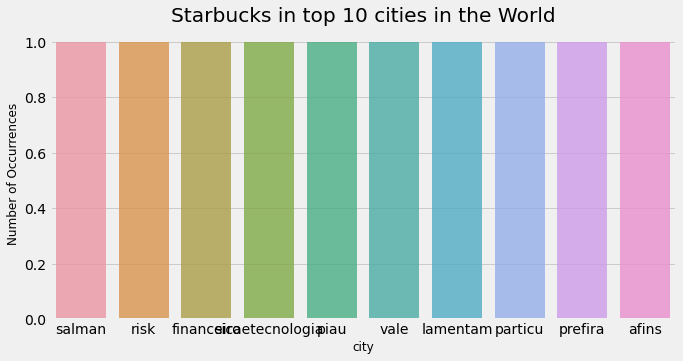

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

word_count = word_count['TOP_WORD'].value_counts() 
word_count = word_count[:10,]

plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)

plt.title('Starbucks in top 10 cities in the World')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [ ]:
word_count['TOP_WORD'].value_counts()[:20].plot(kind='barh')

KeyError: ignored

In [ ]:
word_count

salman             1
risk               1
financeiro         1
sicaetecnologia    1
piau               1
vale               1
lamentam           1
particu            1
prefira            1
afins              1
Name: TOP_WORD, dtype: int64

In [ ]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

l = list(string.ascii_lowercase)
n = np.random.rand(len(l))
a = np.random.choice(l, p=n/n.sum(),size=400)

s = pd.Series(a)
s.value_counts()[:5].plot(kind="bar")

plt.show()

In [ ]:
word_count['TOP_WORD']

0        ensinoremoto
1              ensino
2              remoto
3            educação
4                 ead
             ...     
10533          imóvel
10534        imutável
10535          alguem
10536    impulsionada
10537          𝗿𝗲𝗺𝗼𝘁𝗼
Name: TOP_WORD, Length: 10538, dtype: object

In [ ]:
#word_count['TOP_WORD'].value_counts().plot(kind='bar');

word_count['TOP_WORD'].value_counts()[:10].plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of Tips Received", labelpad=14)
plt.ylabel("Day of Week", labelpad=14)
plt.title("Count of Tips by Day of Week", y=1.02);

KeyError: ignored

In [ ]:
#lista de 20 top - PALAVRAS
# Top 25 users

#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

word_count["count"] = count_matrix.sum(axis = 0).tolist()[0]
word_count  = word_count[:10,]
plt.figure(figsize=(16,8))
sns.barplot(TOP_WORD, count, alpha=0.8)
plt.title('Top 10 usuários')
plt.ylabel('Number de ocorrências', fontsize=14)
plt.xlabel('Usuários', fontsize=14)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

NameError: ignored

<Figure size 1152x576 with 0 Axes>

# Map of Tweets

In [ ]:
# https://github.com/lucasfranklinsilva/Analise-de-Sentimentos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 51 non-null     object 
 1   created_at                  2891 non-null   object 
 2   hashtags                    2059 non-null   object 
 3   media                       926 non-null    object 
 4   urls                        1222 non-null   object 
 5   favorite_count              2891 non-null   int64  
 6   id                          2891 non-null   int64  
 7   in_reply_to_screen_name     165 non-null    object 
 8   in_reply_to_status_id       159 non-null    float64
 9   in_reply_to_user_id         165 non-null    float64
 10  lang                        2891 non-null   object 
 11  place                       83 non-null     object 
 12  possibly_sensitive          1667 non-null   object 
 13  retweet_count               2891 

In [ ]:
#MAP
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from geopy.geocoders import Nominatim

import numpy as np 

In [ ]:
geolocator = Nominatim(user_agent="TweeterSentiments")

latitude = []
longitude = []

for df.user_location in df['user_location']:
    try:
        location = geolocator.geocode(author.location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

In [ ]:

(latitude)

[]

In [ ]:
coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4)

mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('lula-bolsonaro.html')
mapa

In [ ]:
locs = df['author.location'].value_counts()
locs[locs>10]

São Paulo, Brasil                            190
Brasil                                       179
Curitiba, Brasil                              93
Rio de Janeiro                                80
Campus Aracaju                                77
curitiba                                      60
Araçatuba, Brasil                             56
São Paulo                                     51
Rio de Janeiro, Brasil                        49
Brazil                                        49
Here, there and everywhere.                   46
Natal, Brasil                                 41
Belo Horizonte - Brasil                       41
Itapetinga, Jequié e Vitória da Conquista     29
Espírito Santo                                28
Vila Velha, Brasil                            25
Porto Velho, Brasil                           23
São João dos Patos, Brasil                    19
São Paulo - Brasil                            19
Porto Alegre, Brasil                          19
Rio Grande do Sul, B

In [ ]:
df['author.location'] =  df['author.location'].apply(lambda x: mapping[x] if x in mapping.keys() else x )
# https://github.com/cnstlungu/incubator/blob/master/Python/Exploring%20Twitter%20Data%20using%20Python/Exploring%20Twitter%20Data%20using%20Python%20.ipynb
#https://medium.com/analytics-vidhya/exploring-twitter-data-using-python-part-iii-analyzing-the-data-e883aa340dff

## Dicas

Codigos que poderão ser implementados para melhorar esta analise ou futuras**

nRowsRead = 1000 # specify 'None' if want to read whole file
Tweets.csv has 14640 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../input/Tweets.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Tweets.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

 importar dataset com encoding 
full_df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv', header = None, names = columns,  encoding='latin-1')

https://www.kaggle.com/parthsharma5795/comprehensive-twitter-airline-sentiment-analysis 
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


f.rename(columns={'tfr': 'TFR'}) #renomear coluna



*   Item da lista

*   Item da lista
*   Item da lista


*   Item da lista



# Referências consultadas



https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/

https://necromuralist.github.io/Neurotic-Networking/posts/nlp/twitter-word-frequencies/

https://marcobonzanini.com/2015/03/17/mining-twitter-data-with-python-part-3-term-frequencies/

https://advertools.readthedocs.io/en/master/advertools.word_frequency.html

https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

https://minerandodados.com.br/analise-de-sentimentos-twitter-como-fazer/base-dados-scripts https://www.oreilly.com/library/view/mining-the-social/9781491973547/ch01.html
https://dev.to/mchdax/coletando-dados-do-twitter-com-python-1c7k
https://www.kaggle.com/amar09/sentiment-analysis-on-scrapped-tweets  LER

https://www.kaggle.com/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp 

https://www.kaggle.com/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model muito bom

https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb

